In [119]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
import pandas as pd
import os

Defaulting to user installation because normal site-packages is not writeable


In [65]:
lama = pd.read_excel("/home/carlitos/Downloads/lama.xlsx")
lama.rename(columns={"Unnamed: 0":"Nome"}, inplace=True)
lama.set_index("Nome", inplace=True)
LAMA=lama.T

In [70]:
Uninfected = [i for i in LAMA.columns.to_list() if "Uninfected" in i]
Infected = [i for i in LAMA.columns.to_list() if "Infected" in i]
for i,o in zip(Uninfected,Infected):
    print(i,"   ",o)

Lama_Uninfected_24h_R1     Lama_Infected_24h_R1
Lama_Uninfected_24h_R2     Lama_Infected_24h_R2
Lama_Uninfected_24h_R3     Lama_Infected_24h_R3
Lama_Uninfected_48h_R1     Lama_Infected_48h_R1
Lama_Uninfected_48h_R2     Lama_Infected_48h_R2
Lama_Uninfected_48h_R3     Lama_Infected_48h_R3
Lama_Uninfected_4h_R1     Lama_Infected_4h_R1
Lama_Uninfected_4h_R2     Lama_Infected_4h_R2
Lama_Uninfected_4h_R3     Lama_Infected_4h_R3
Lama_Uninfected_72h_R1     Lama_Infected_72h_R1
Lama_Uninfected_72h_R2     Lama_Infected_72h_R2
Lama_Uninfected_72h_R3     Lama_Infected_72h_R3


In [112]:
lama_Uninfected = LAMA.loc[Uninfected]
lama_Infected = LAMA.loc[Infected]
lama_Infected

,YTHDF 1,YTHDF 2,YTHDF 3,YTHDC 1,ALKBH 3,ALKBH 1,FTO,ALKBH 7,TRMT 6,NML,...,HDAC10/83933,SIRT1/23411,SIRT2/22933,SIRT3/23410,SIRT4/23409,SIRT5/23408,SIRT6/51548,SIRT7/51547,Status,Status2
Nome,,,,,,,,,,,,,,,,,,,,,
Lama_Infected_24h_R1,4.78697,5.172648,6.114749,-5.433106,4.150573,4.643531,3.453639,3.883899,4.000383,3.261006,...,2.722845,4.969701,5.769426,1.890264,-2.902591,1.8492,3.798627,4.40737,Lama_Infected_24,R1
Lama_Infected_24h_R2,5.018997,5.499894,5.755357,-3.643375,4.311767,3.576009,3.820026,4.379859,3.435799,3.194951,...,3.882962,3.660341,5.819332,3.28306,-2.019751,3.053969,4.377371,5.106719,Lama_Infected_24,R2
Lama_Infected_24h_R3,4.845101,5.350962,5.976349,-4.795506,4.191238,3.3357,4.070925,4.243403,3.653154,3.030044,...,3.06439,3.685031,5.570117,2.160132,-2.738922,2.458318,4.16018,4.509431,Lama_Infected_24,R3
Lama_Infected_48h_R1,4.998841,5.487303,6.481777,-3.479019,4.00342,4.733572,3.488726,4.21164,4.08651,3.187079,...,2.606543,5.431951,5.972513,2.038362,-1.948504,2.439167,4.1981,4.585073,Lama_Infected_48,R1
Lama_Infected_48h_R2,4.909372,5.45548,5.891765,-6.488035,4.424708,3.31932,3.92855,5.097249,3.458501,2.968344,...,3.960417,3.465803,6.04133,3.392712,-0.95752,3.342615,3.982818,4.98517,Lama_Infected_48,R2
Lama_Infected_48h_R3,4.877132,5.362321,6.239192,-4.66817,4.231223,3.424587,4.268142,4.729957,3.103624,2.861555,...,3.146835,3.877692,6.127869,3.388061,-1.459584,3.359753,3.538816,3.996297,Lama_Infected_48,R3
Lama_Infected_4h_R1,4.318083,4.896659,6.330472,0.0,2.938454,2.894115,3.366164,3.829573,3.104064,2.383824,...,3.079785,4.007292,6.382553,1.225832,-3.352352,1.882023,3.071035,3.732635,Lama_Infected_4,R1
Lama_Infected_4h_R2,5.333188,5.399034,6.595073,-3.534949,2.98231,3.726972,2.869776,3.956872,3.022828,2.938414,...,3.347119,4.37042,6.04812,1.682627,-2.911324,2.021996,3.624104,4.695591,Lama_Infected_4,R2
Lama_Infected_4h_R3,4.77517,5.136276,6.179396,-4.374831,2.411,2.651477,2.510451,4.152329,3.388899,2.078273,...,2.964115,3.892131,6.144936,0.970234,0.0,1.087409,3.373764,3.498595,Lama_Infected_4,R3


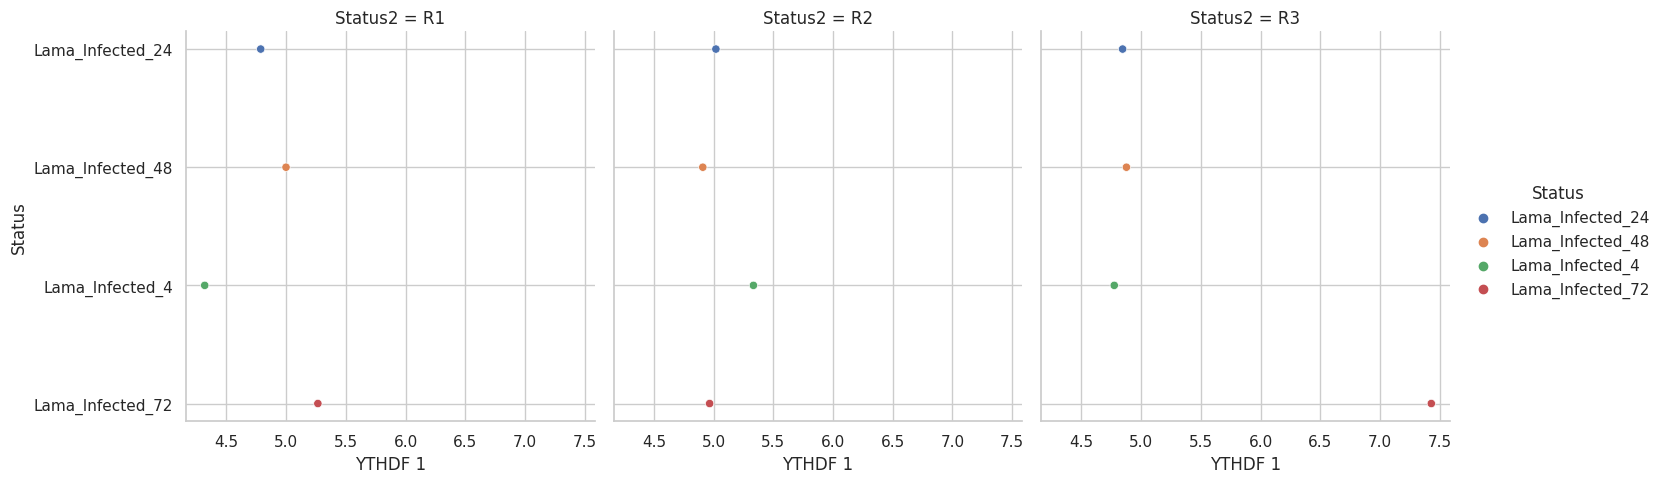

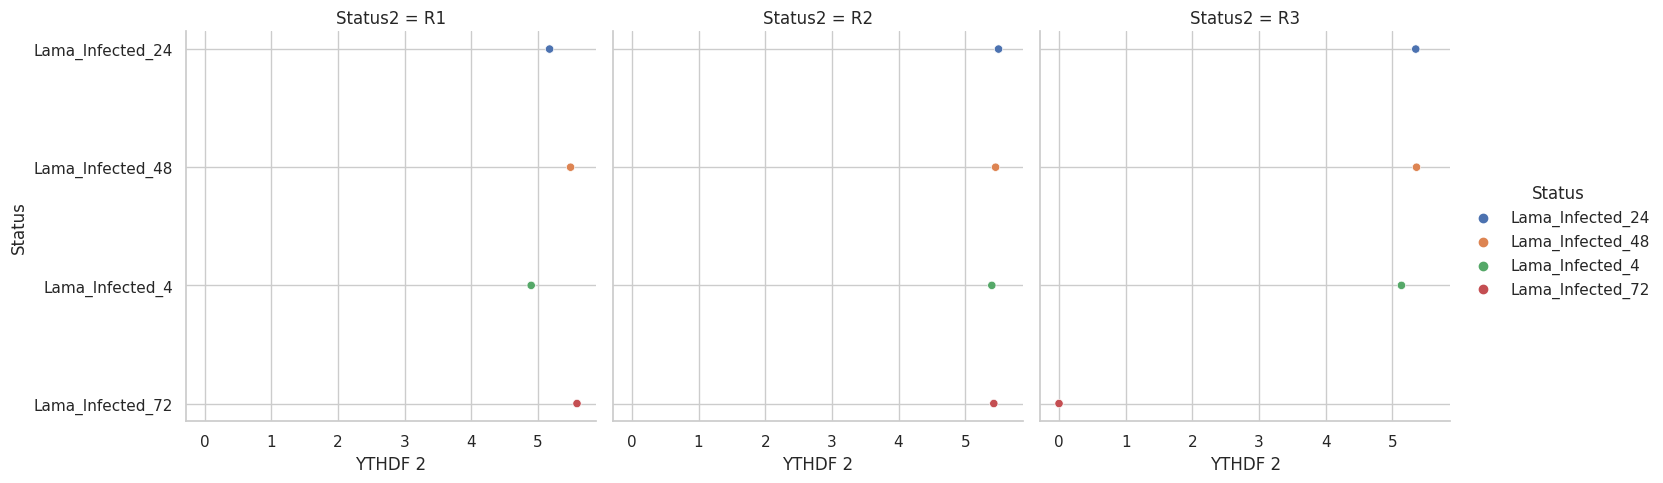

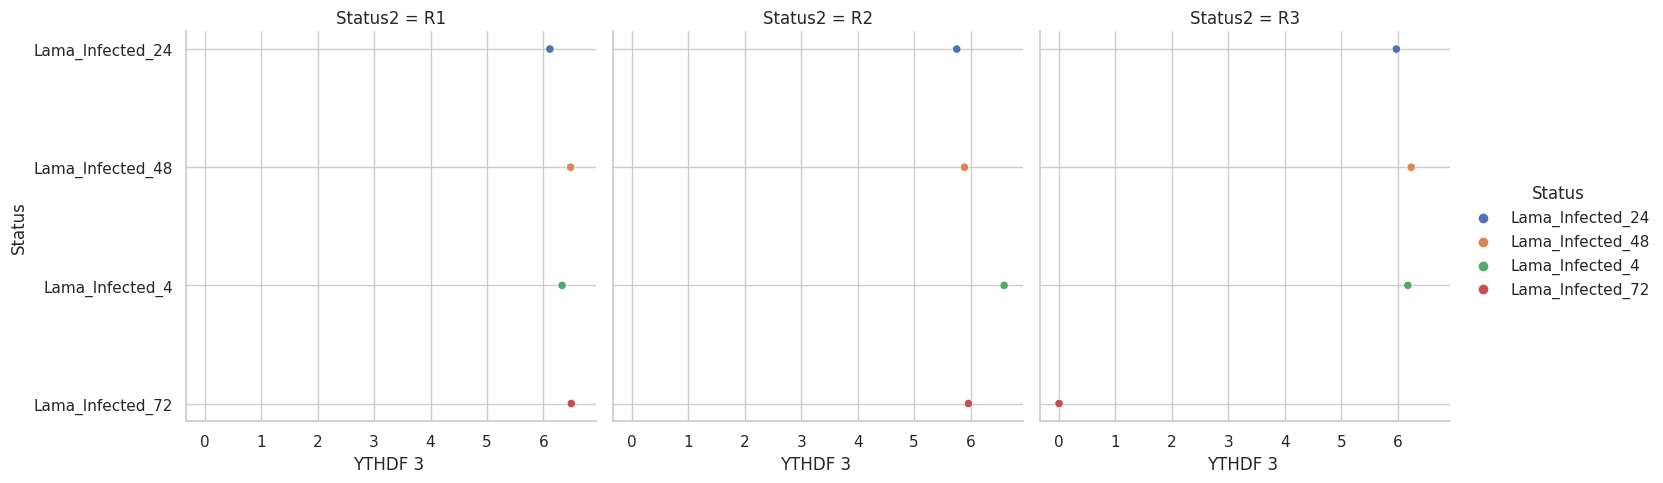

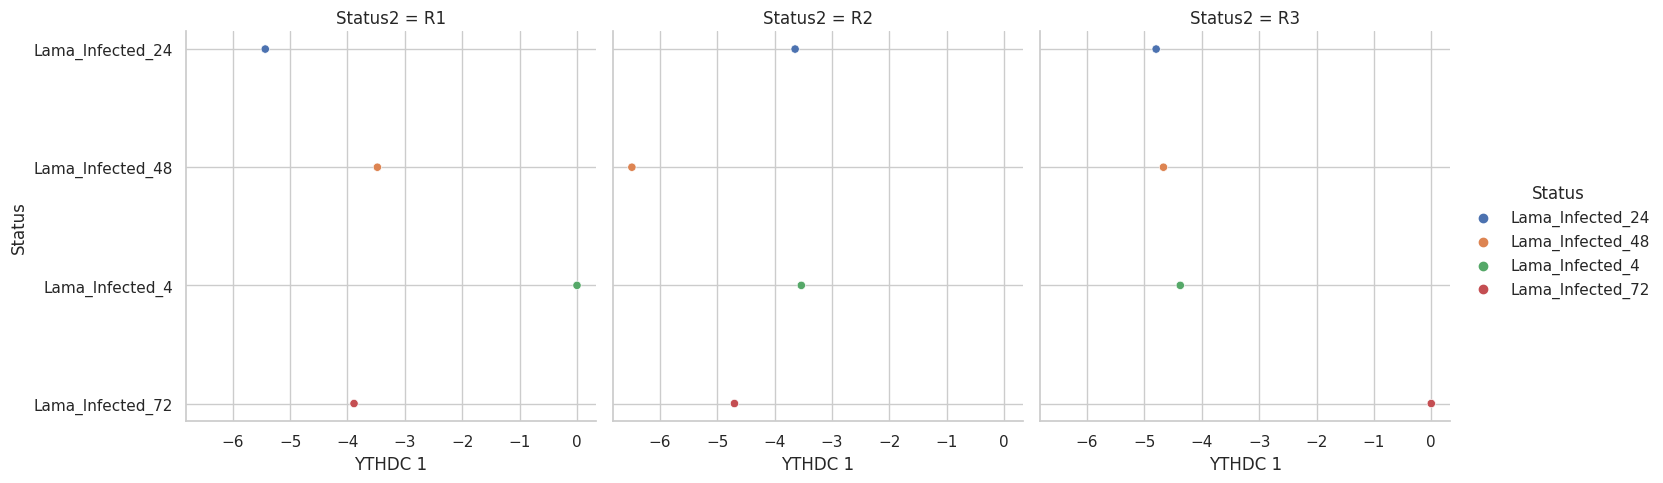

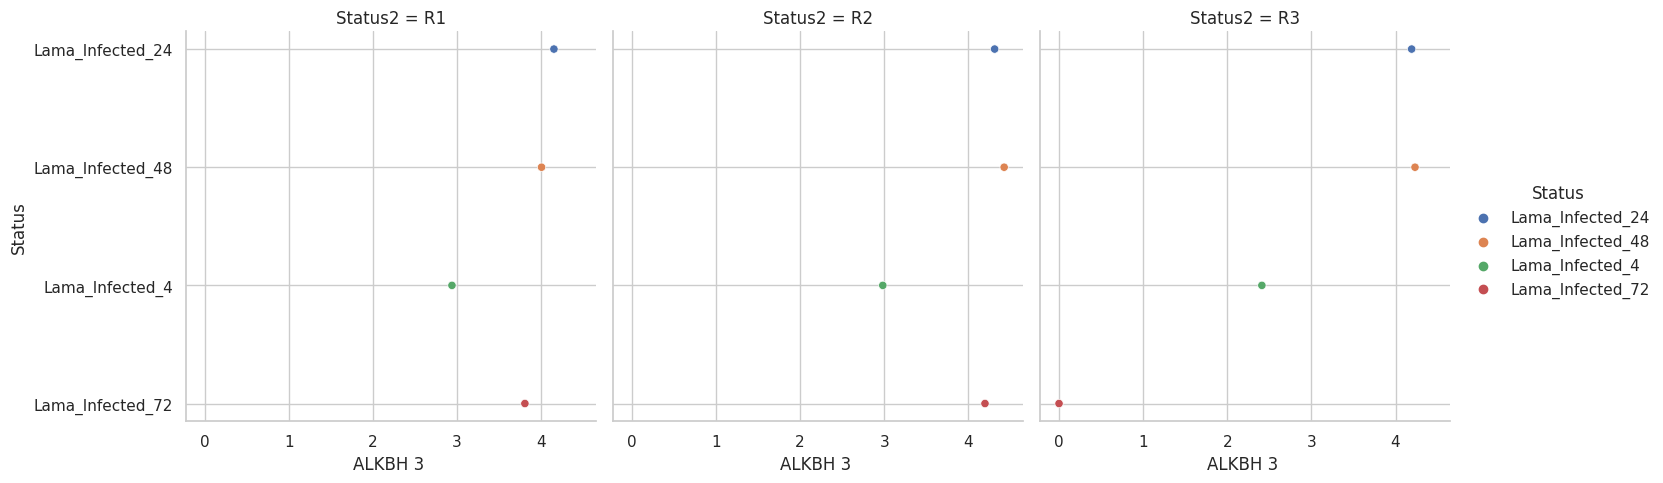

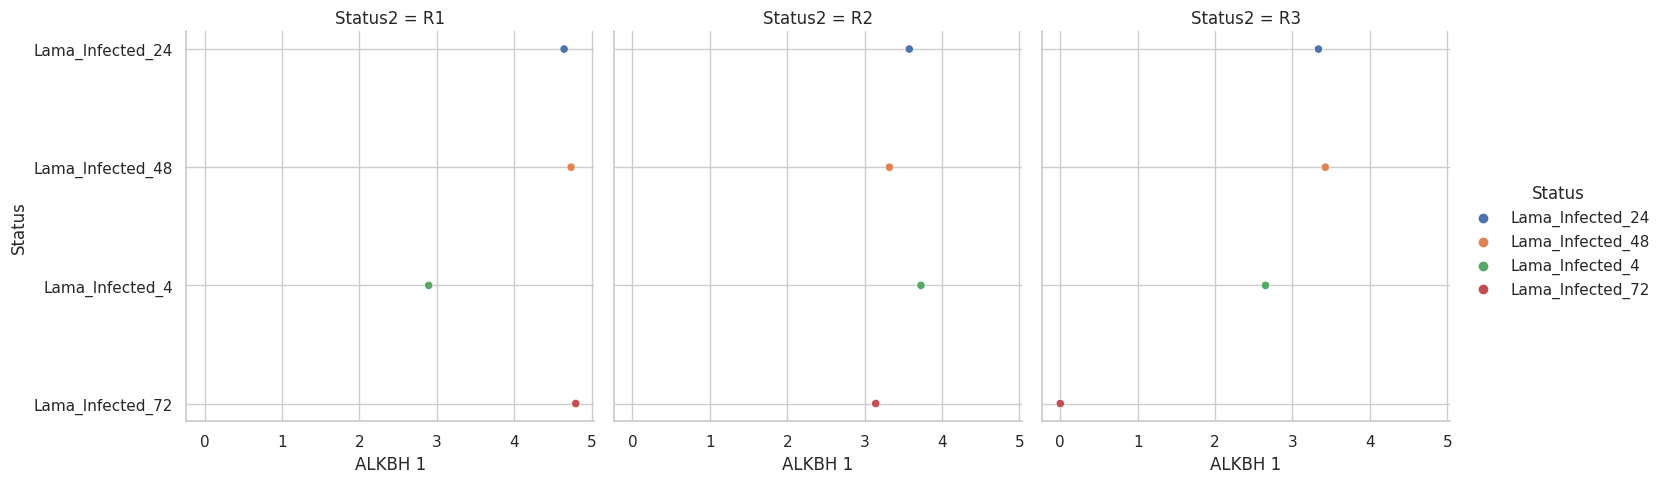

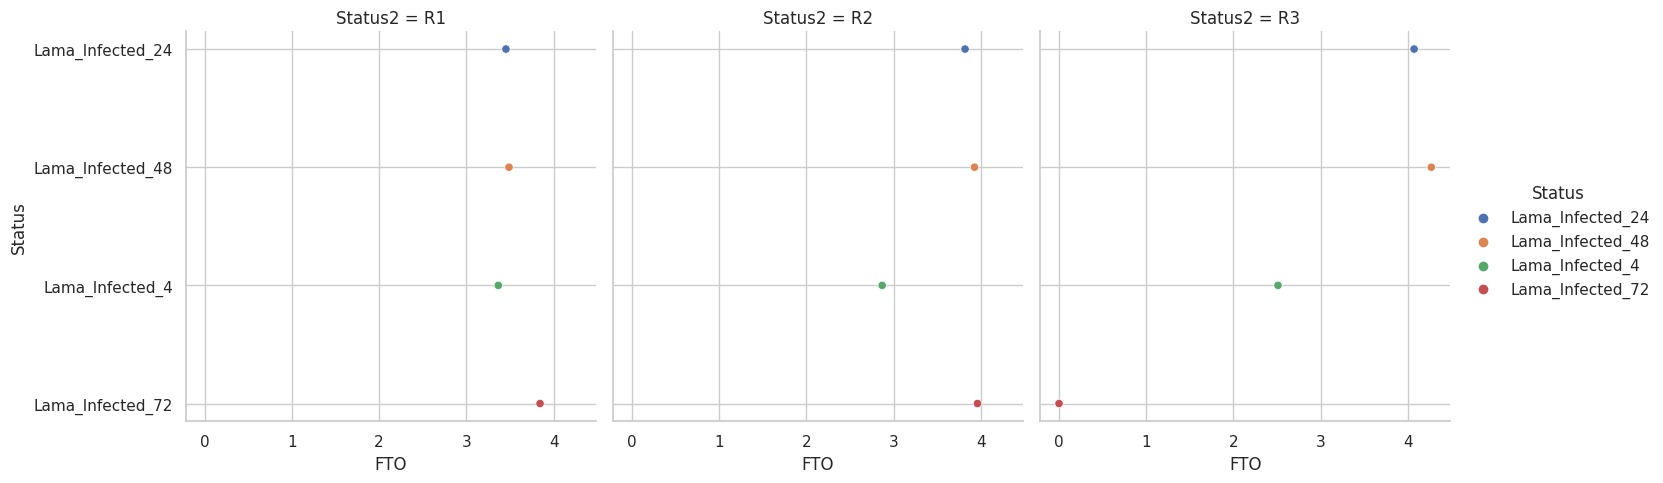

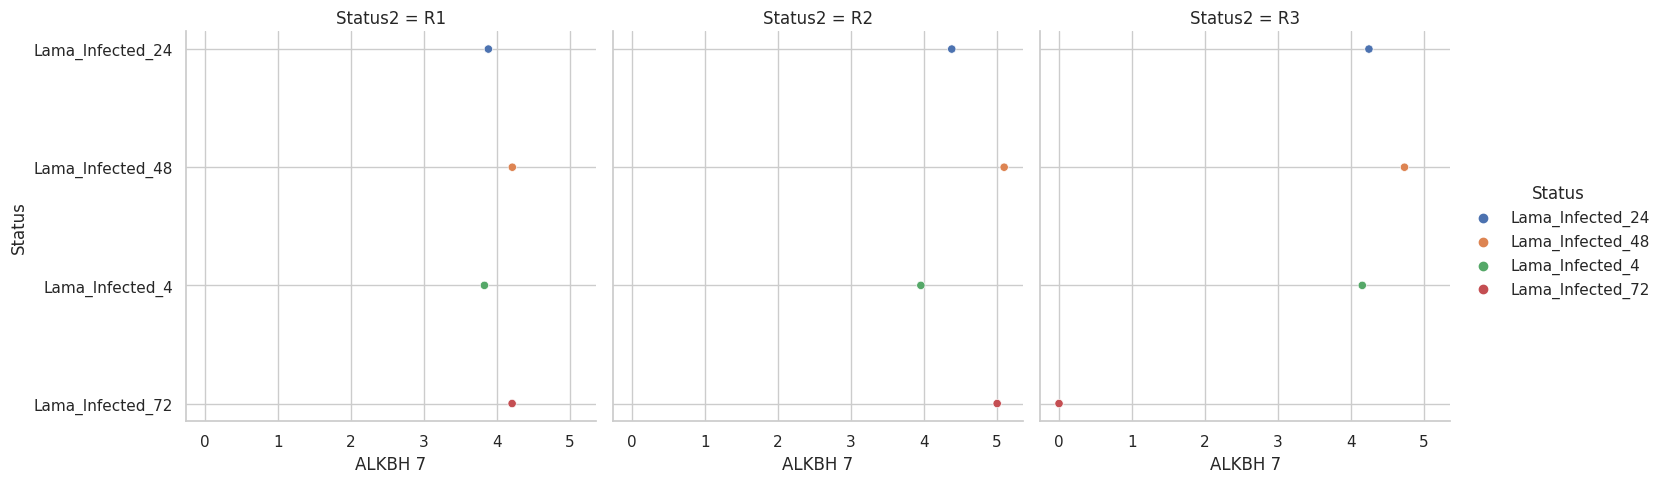

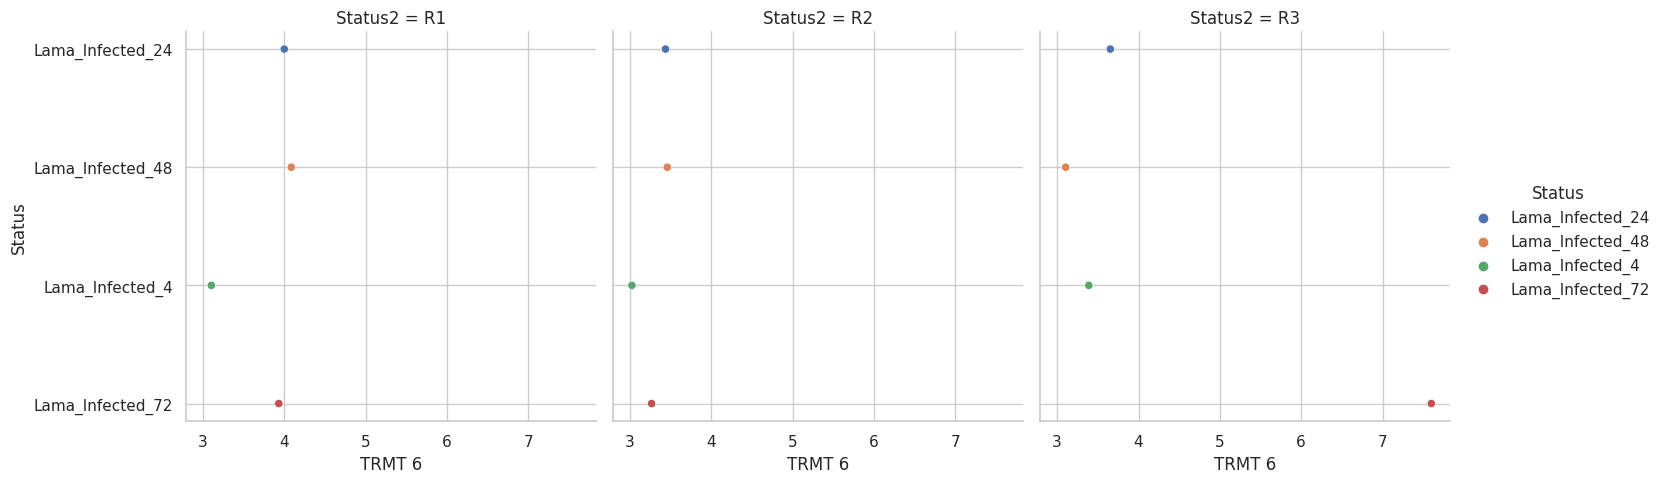

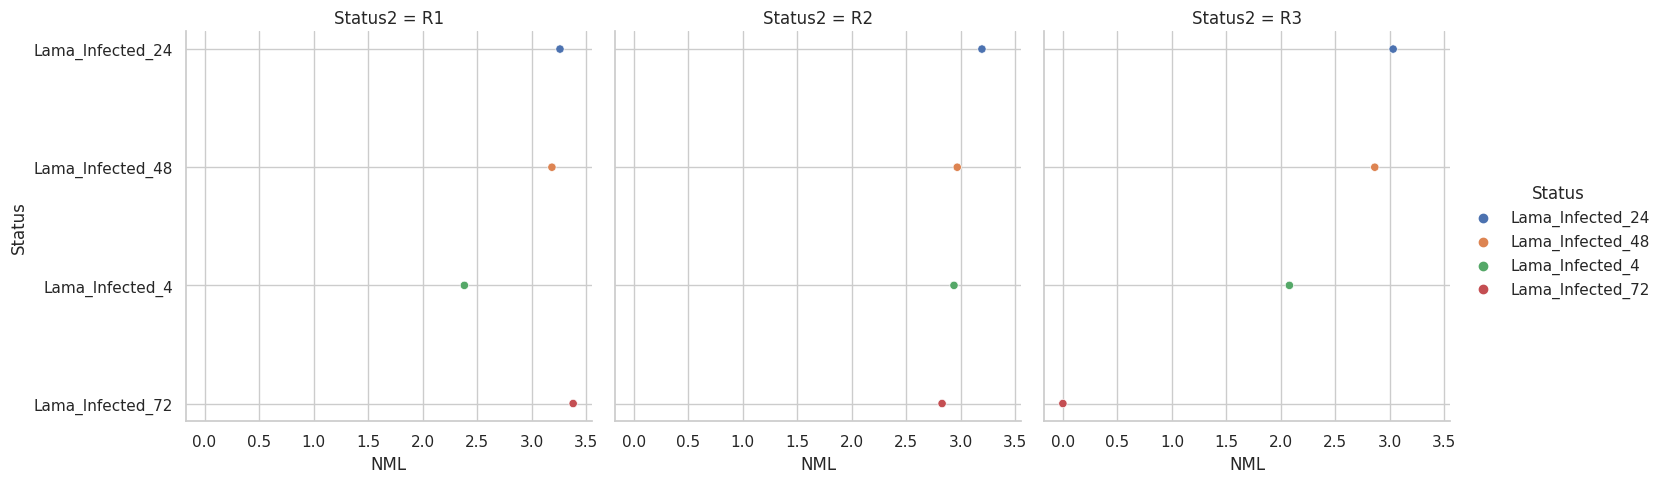

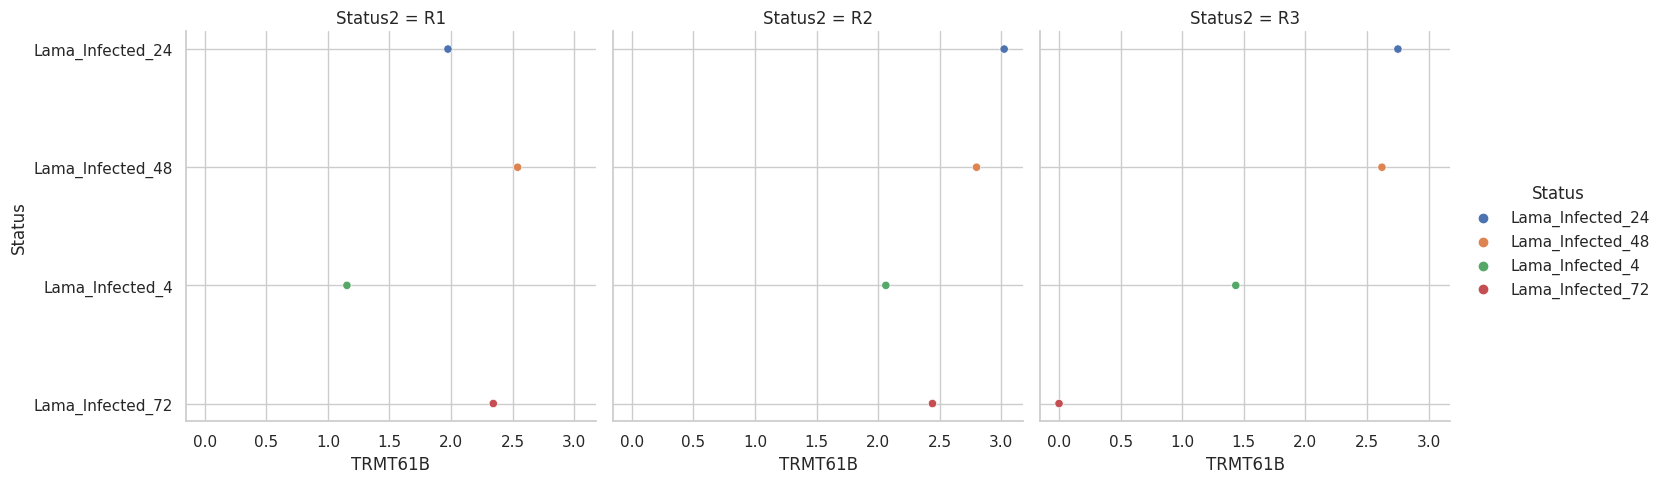

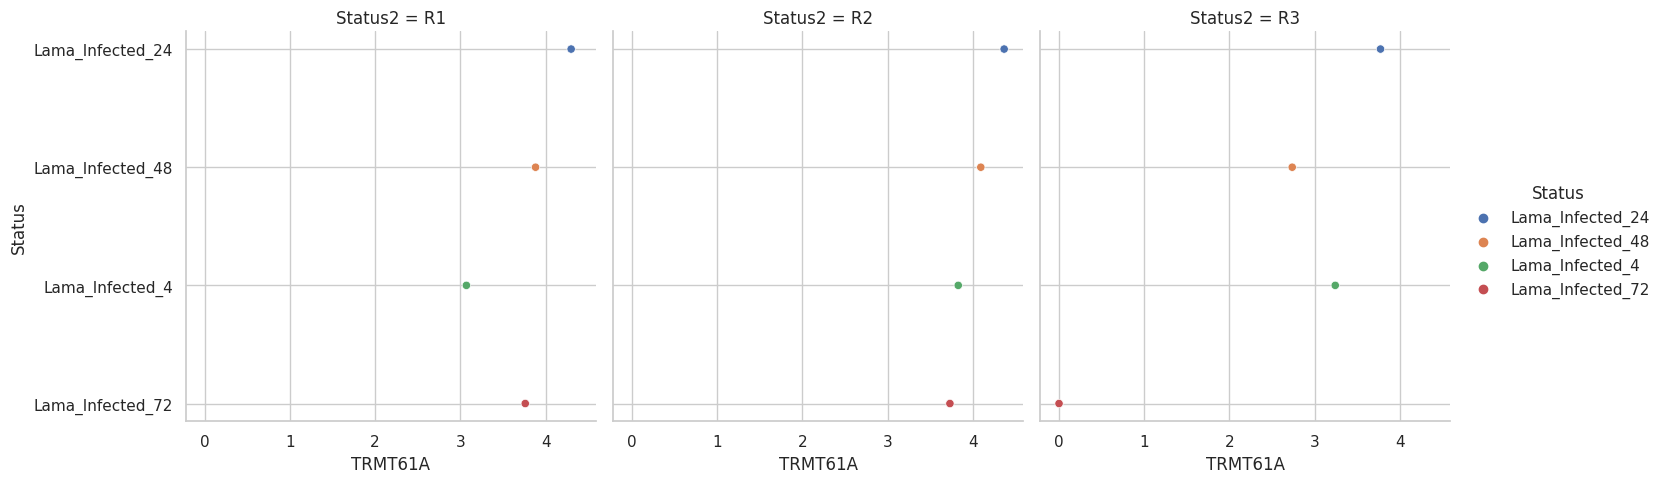

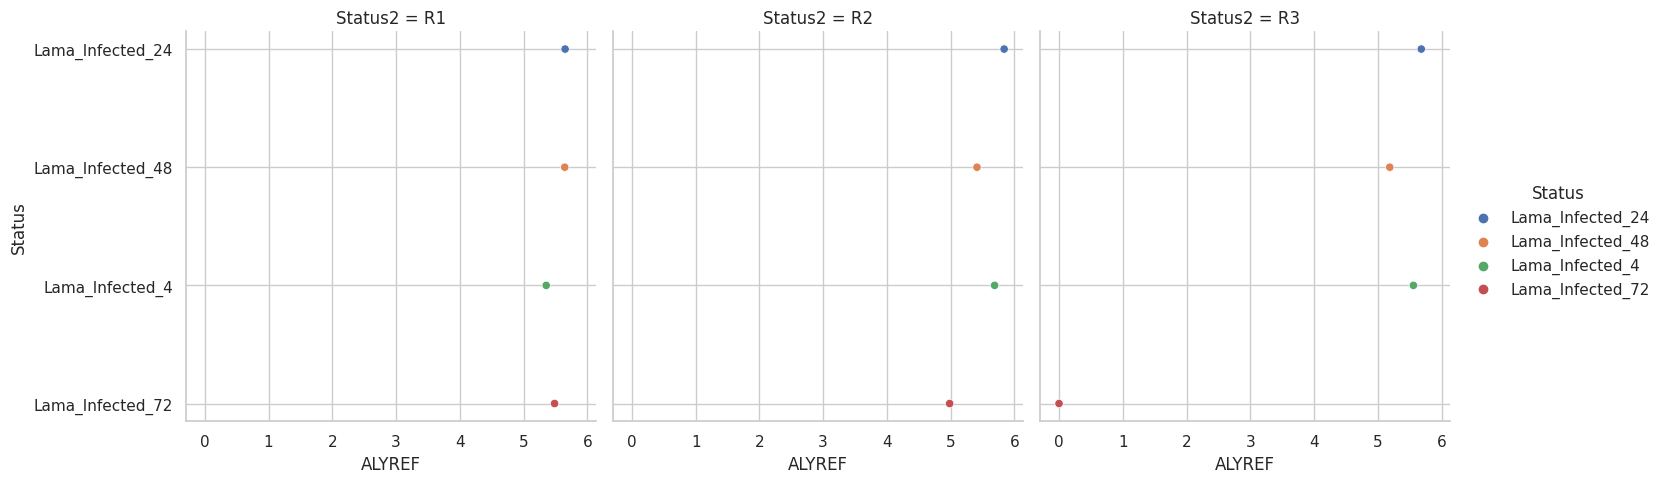

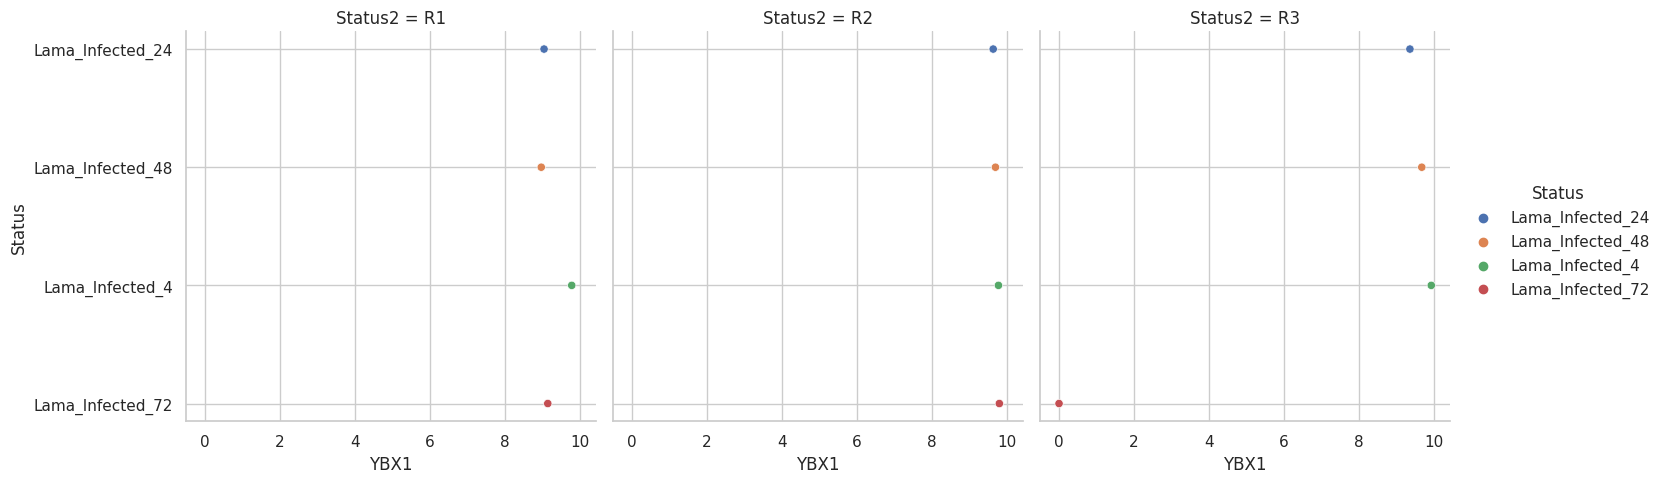

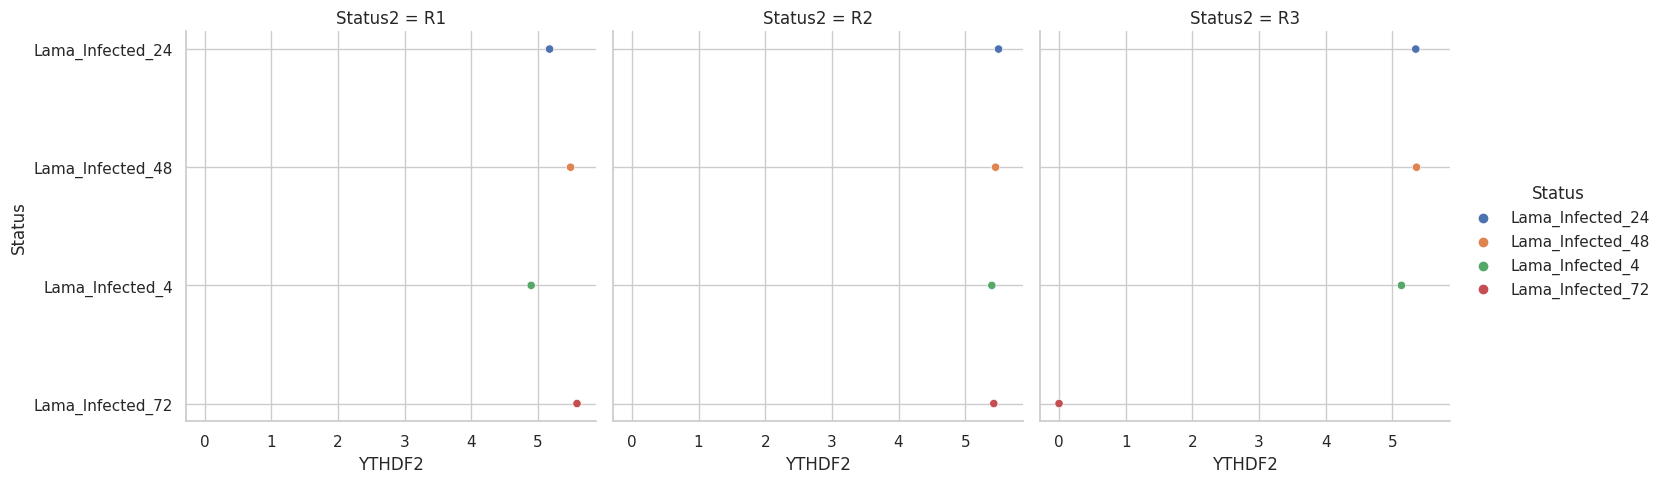

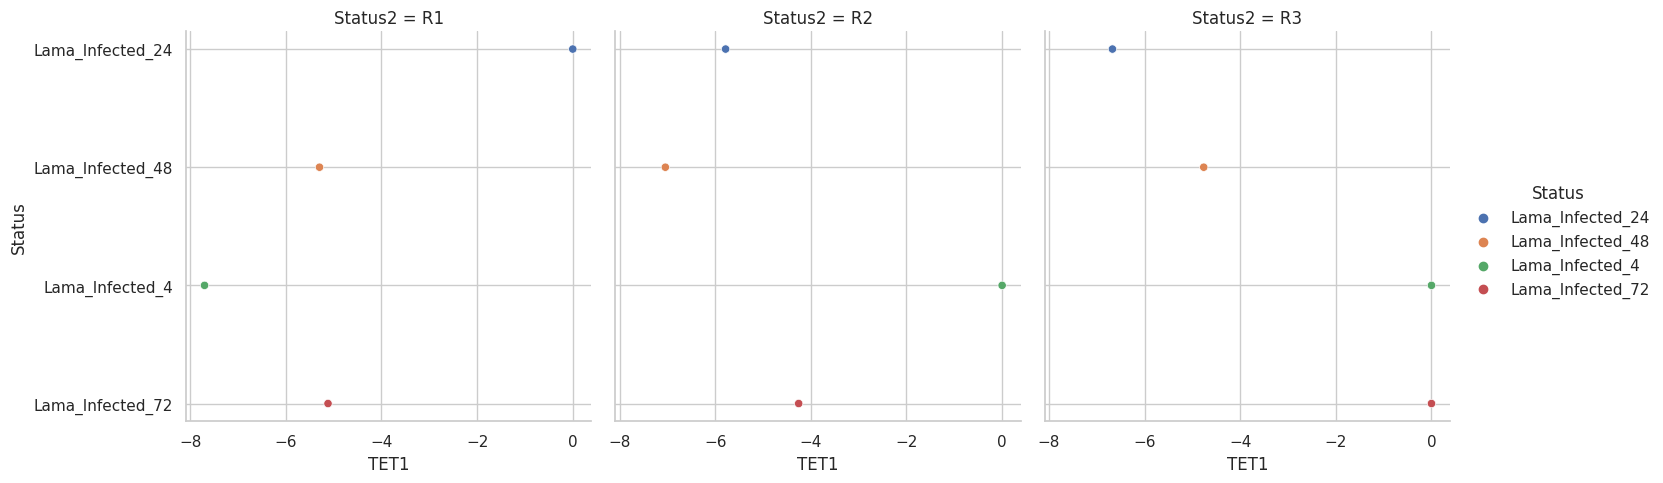

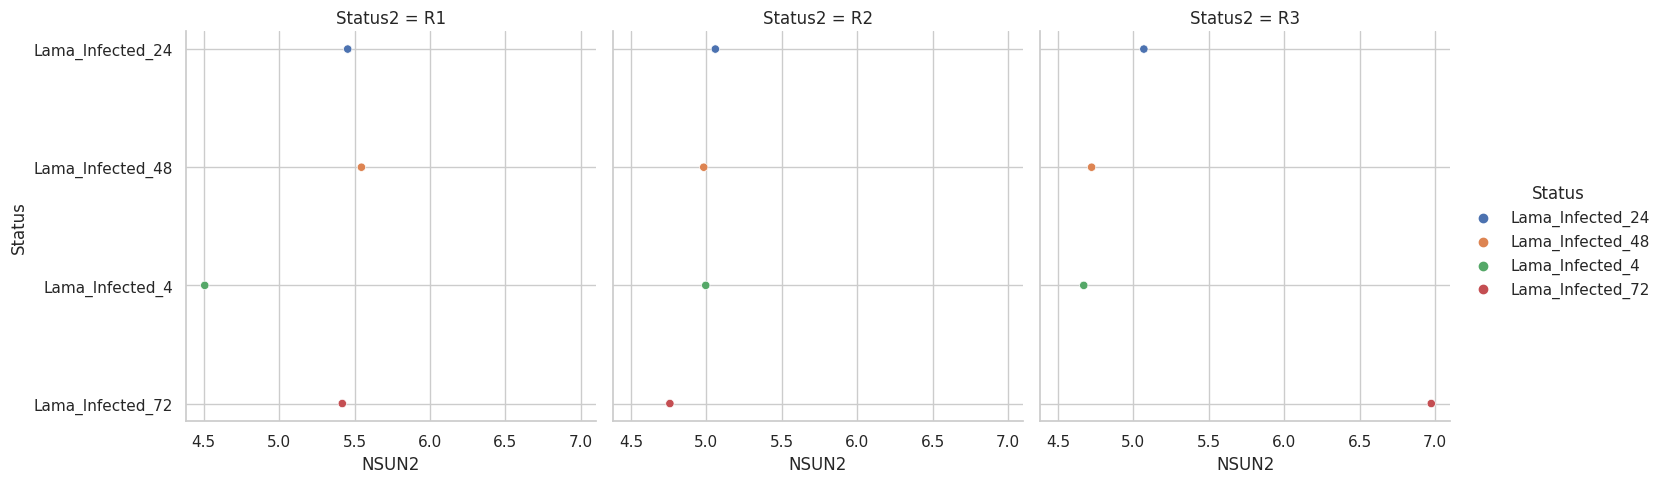

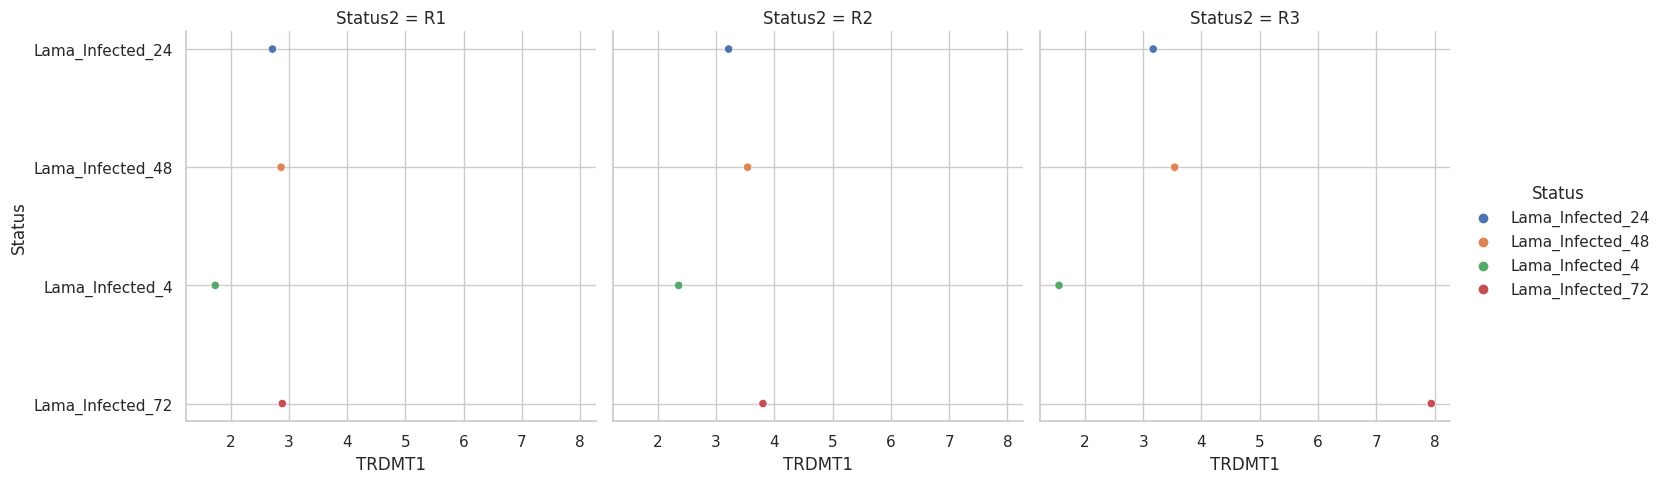

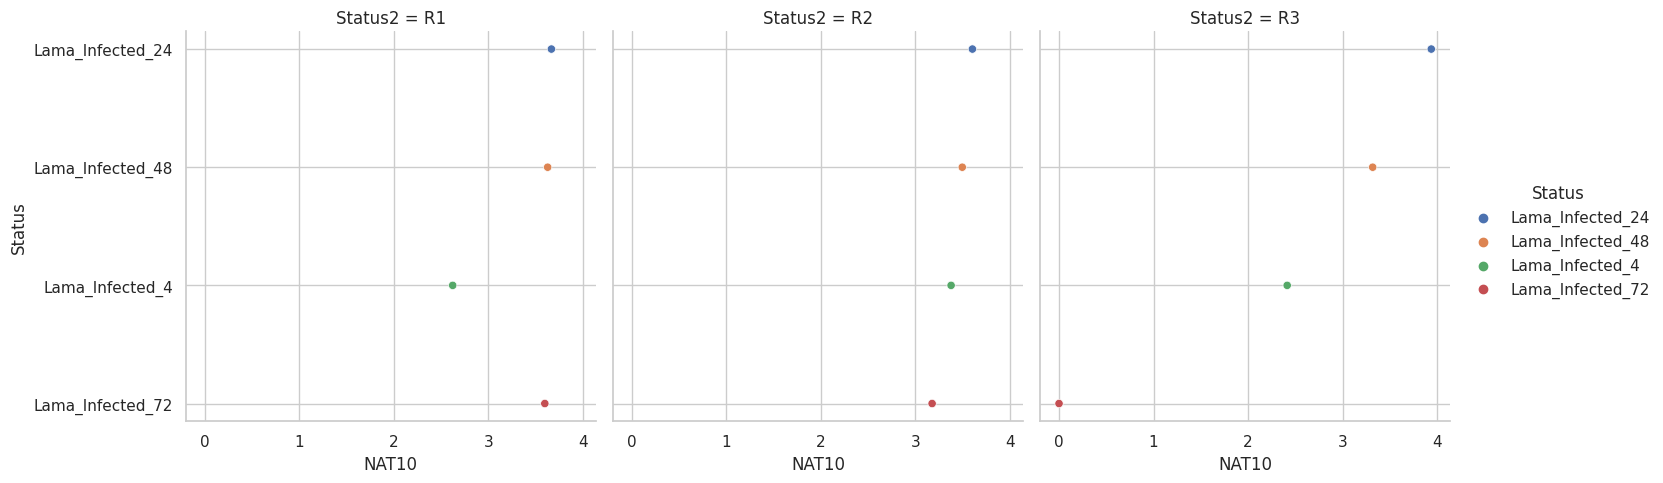

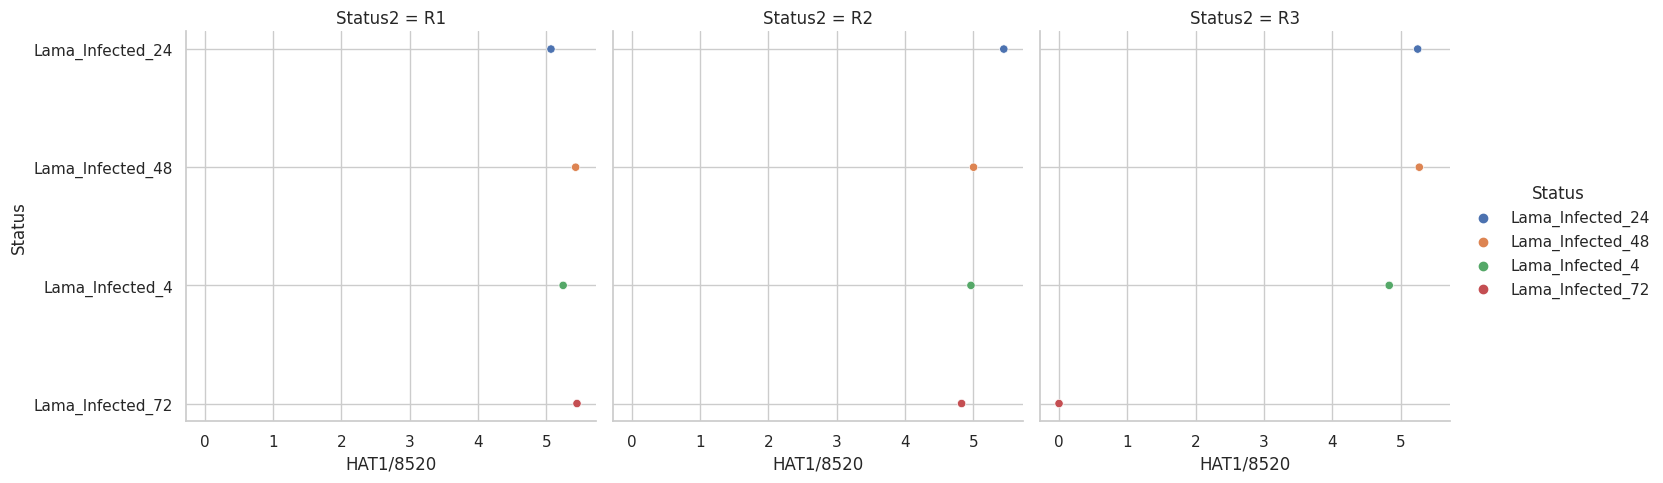

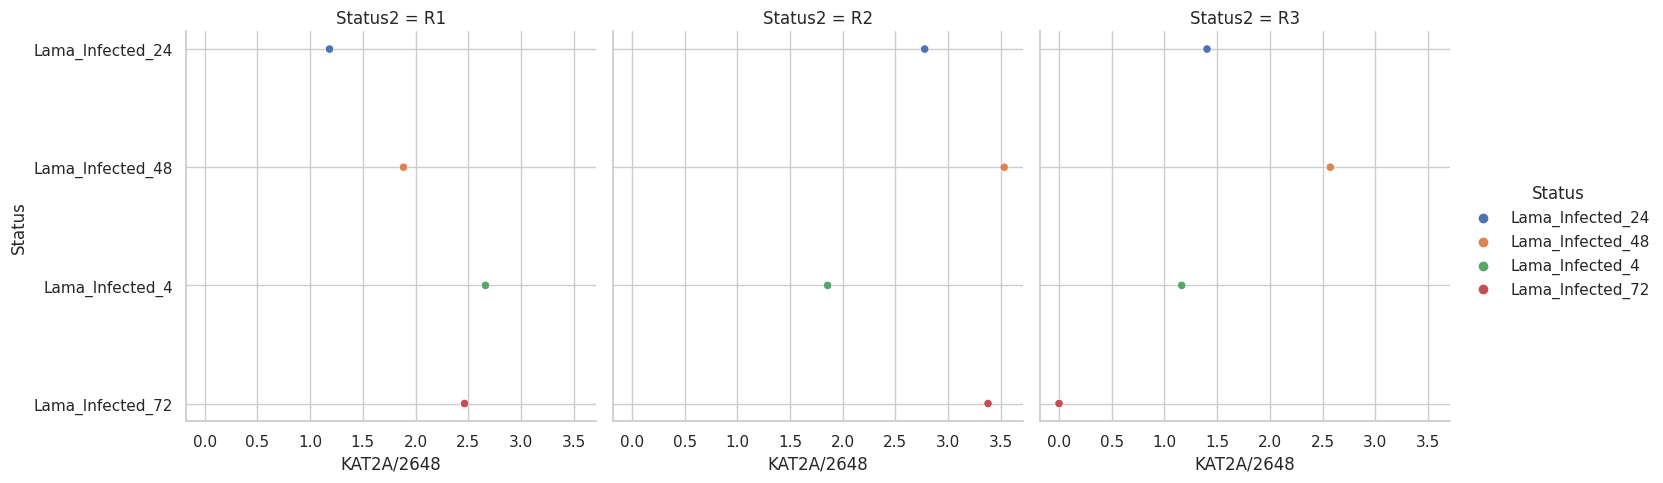

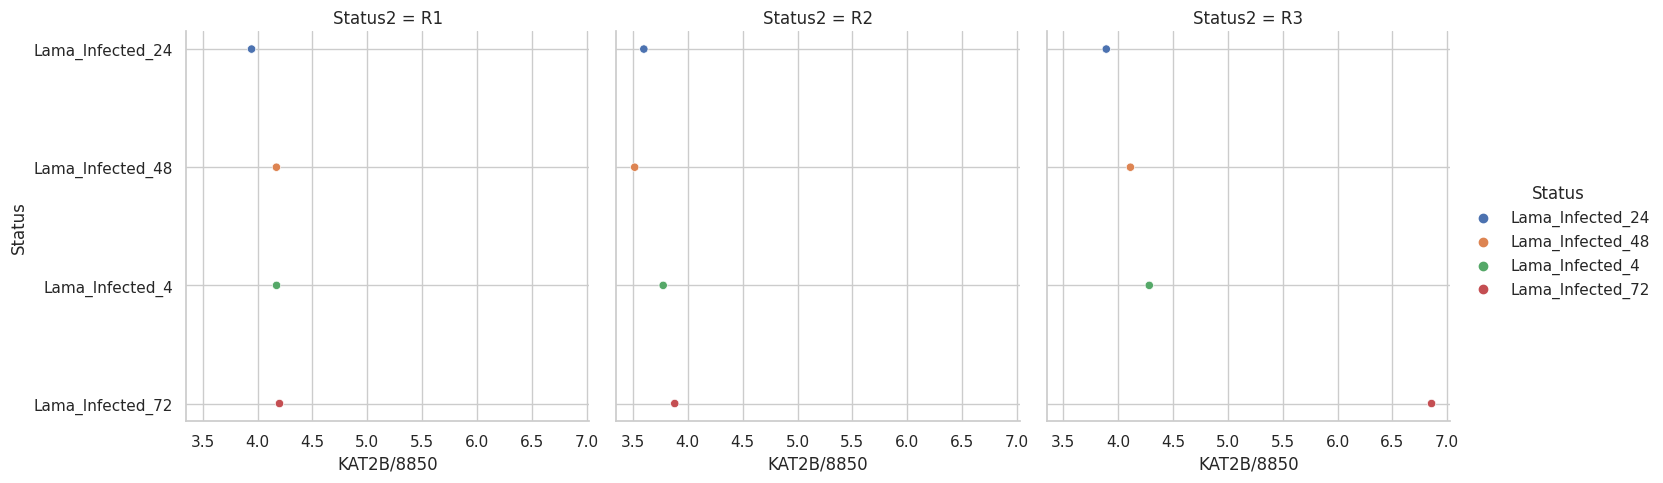

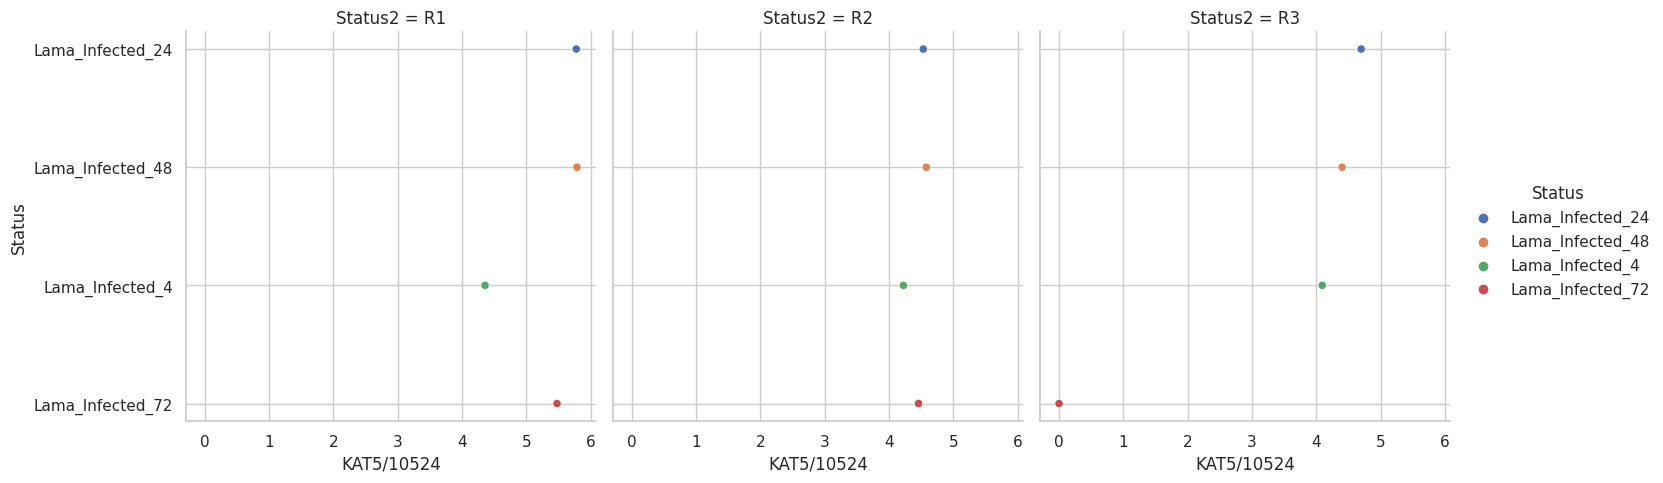

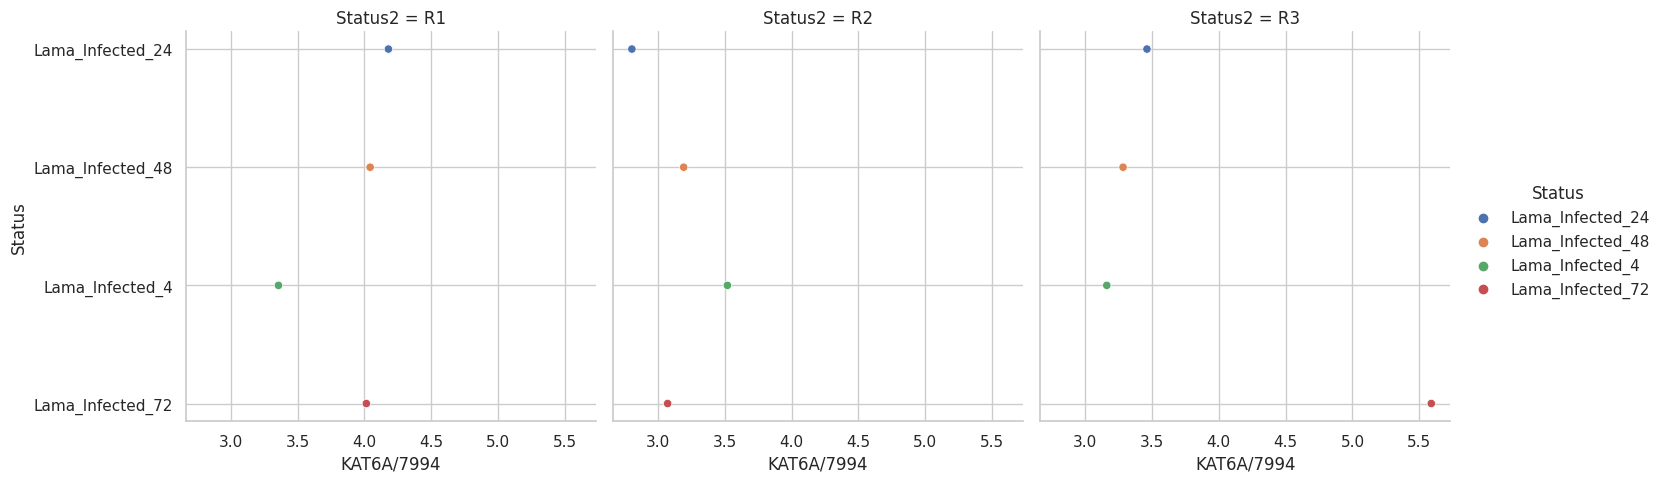

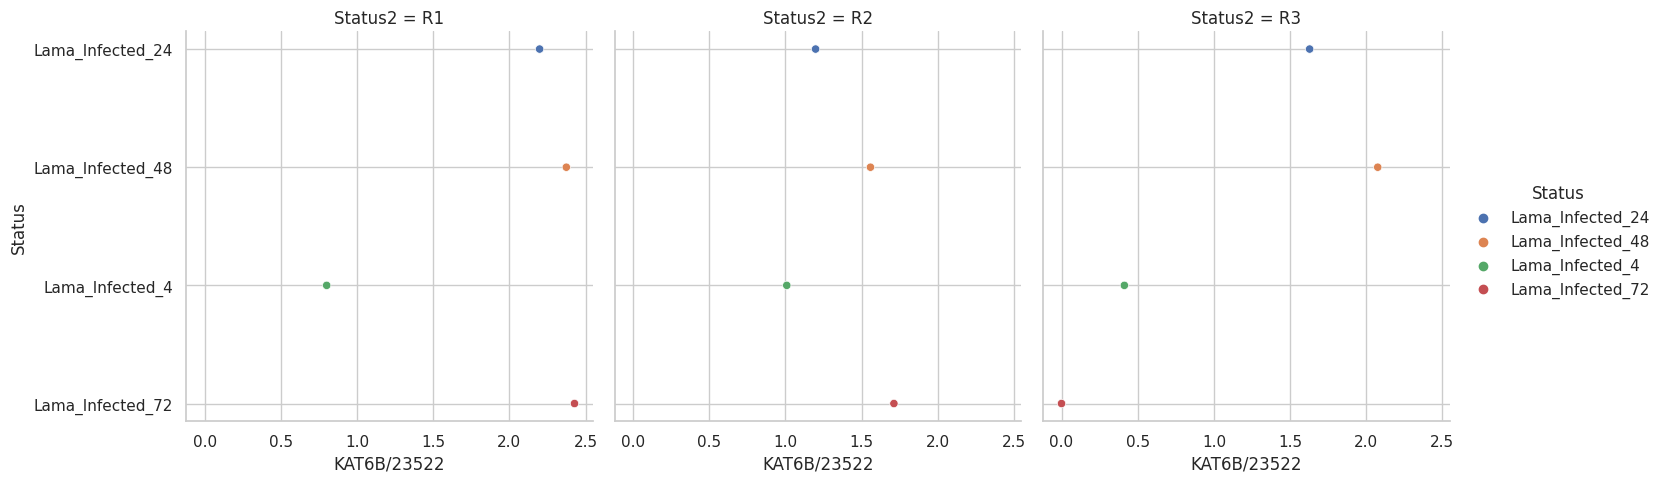

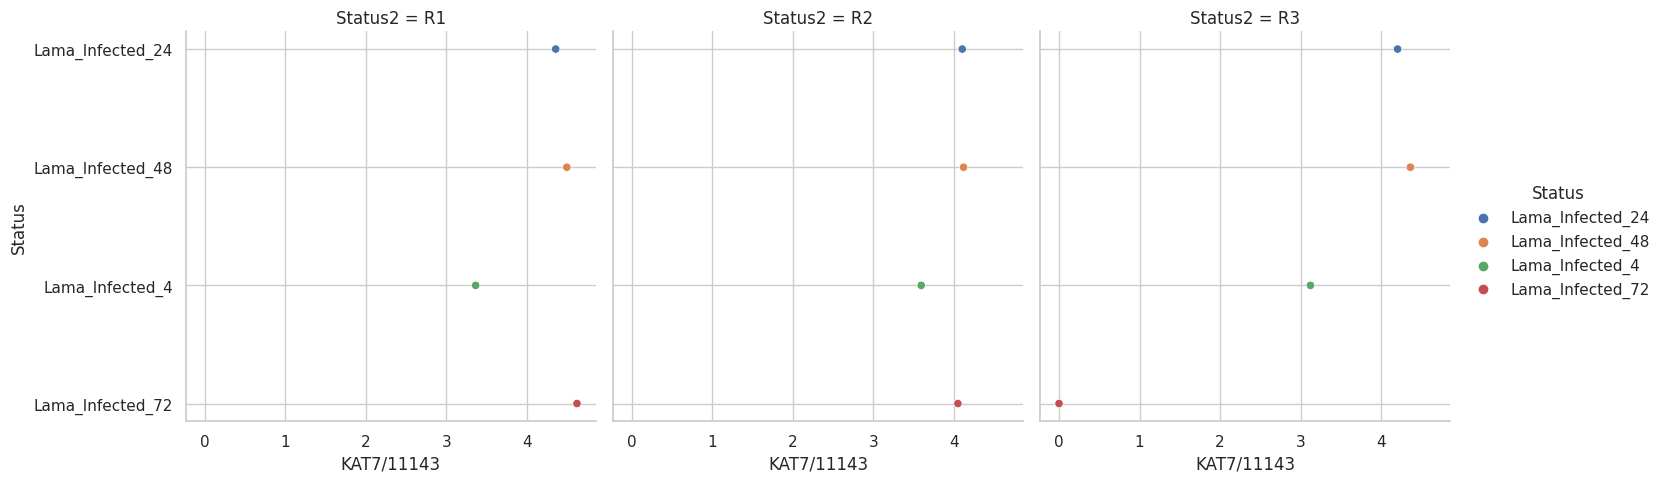

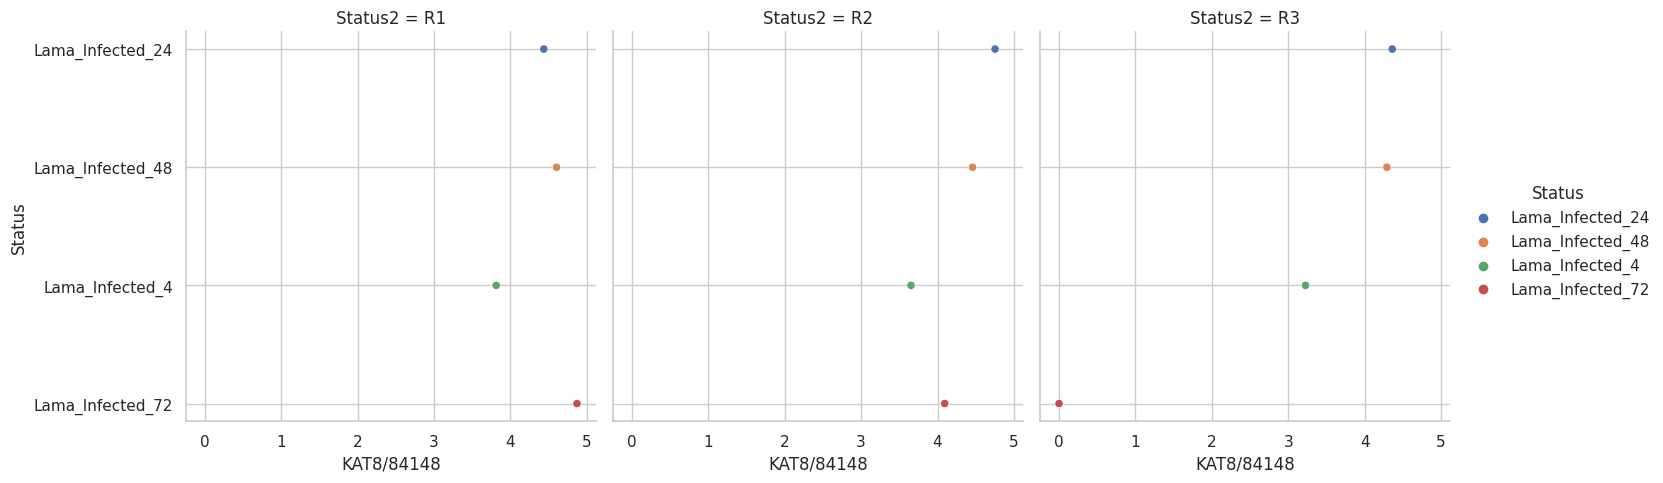

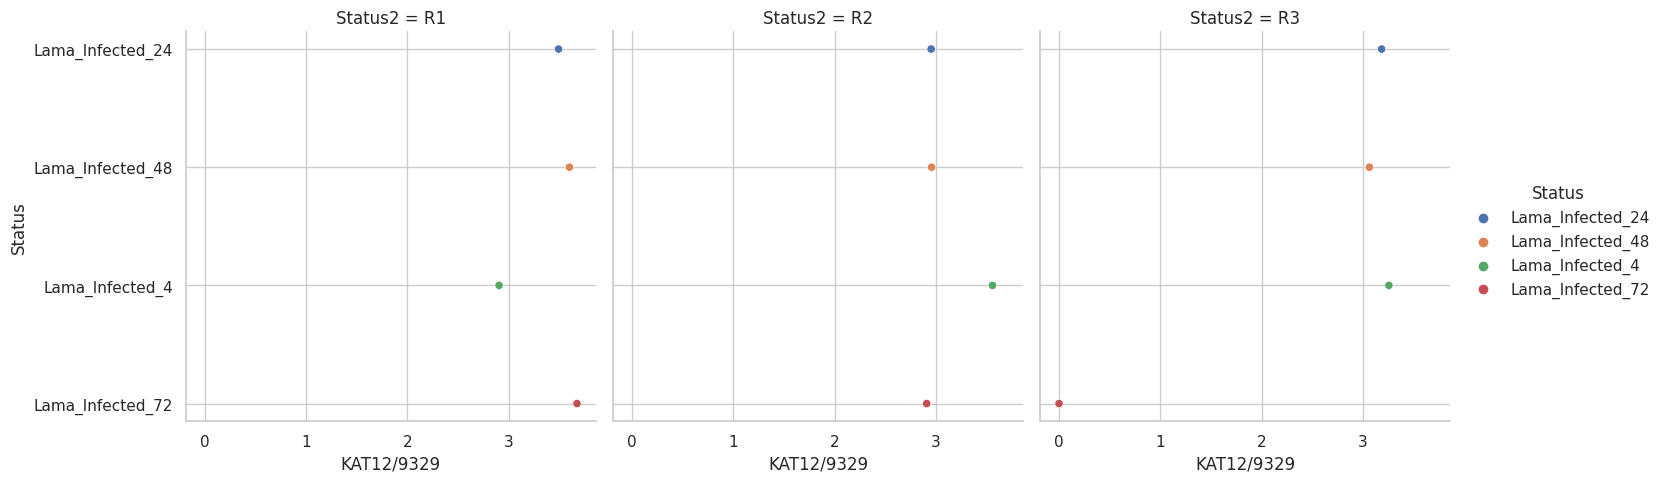

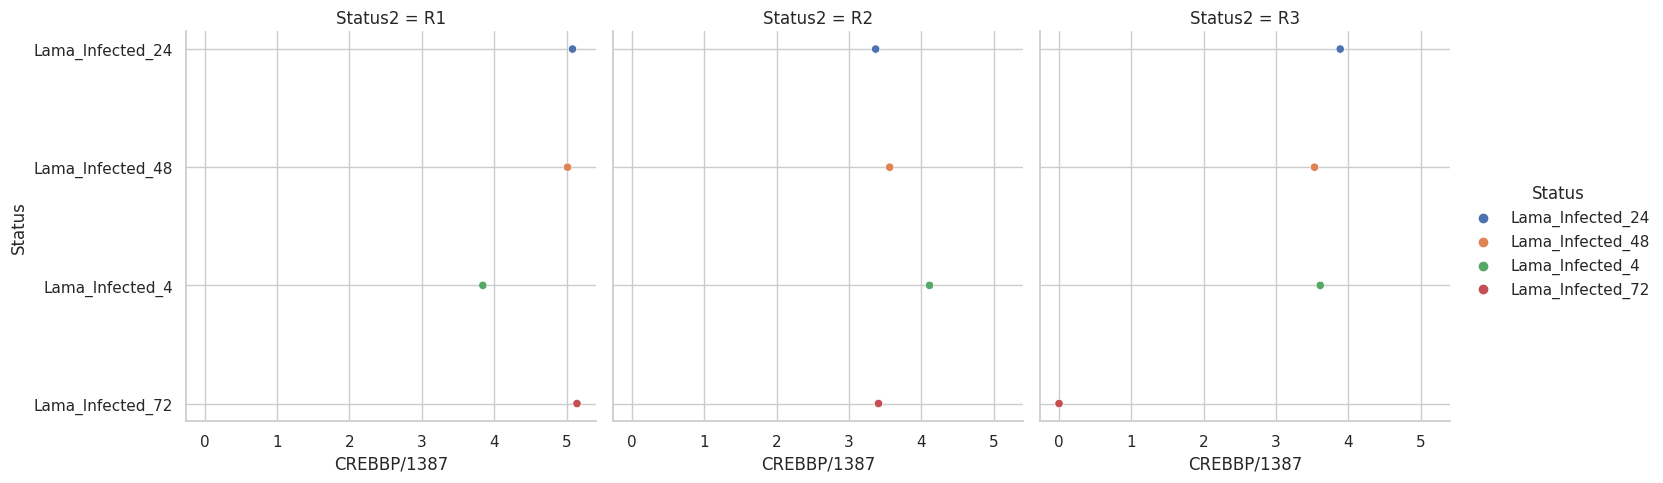

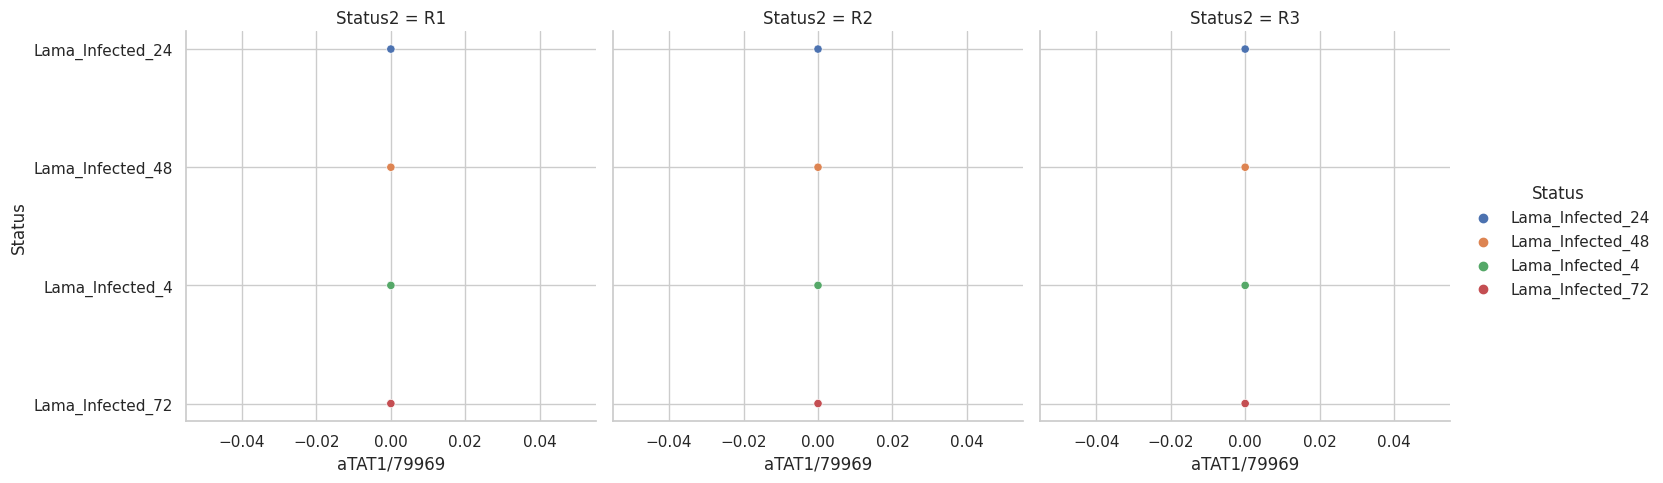

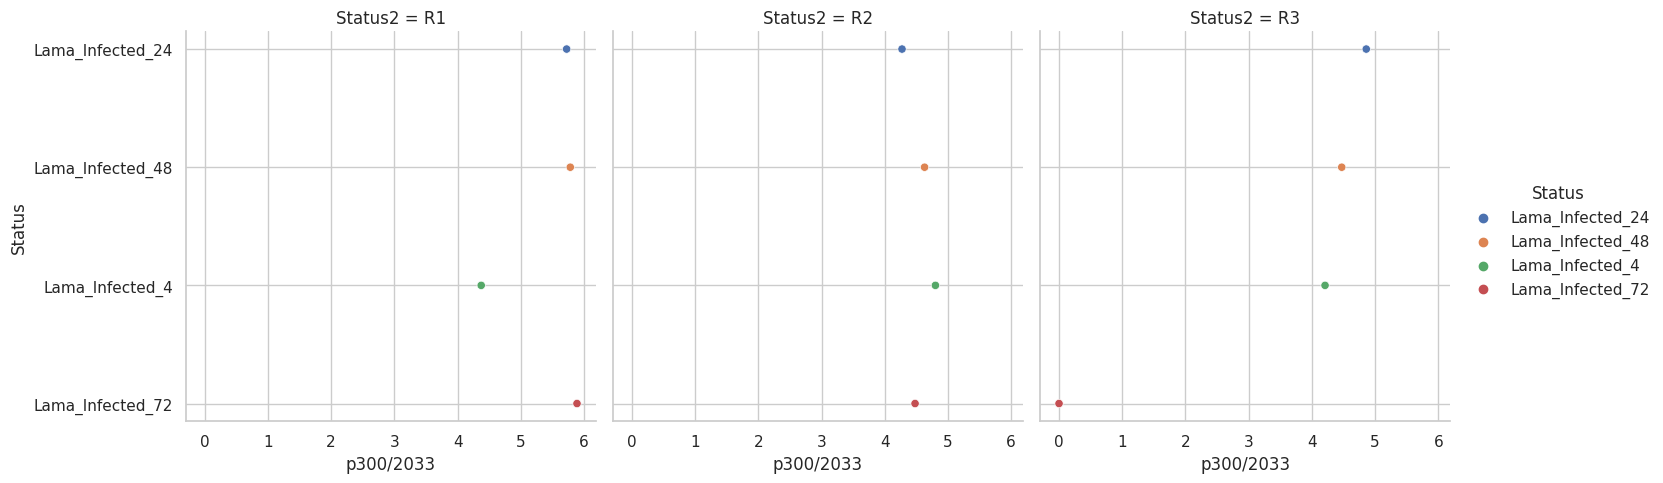

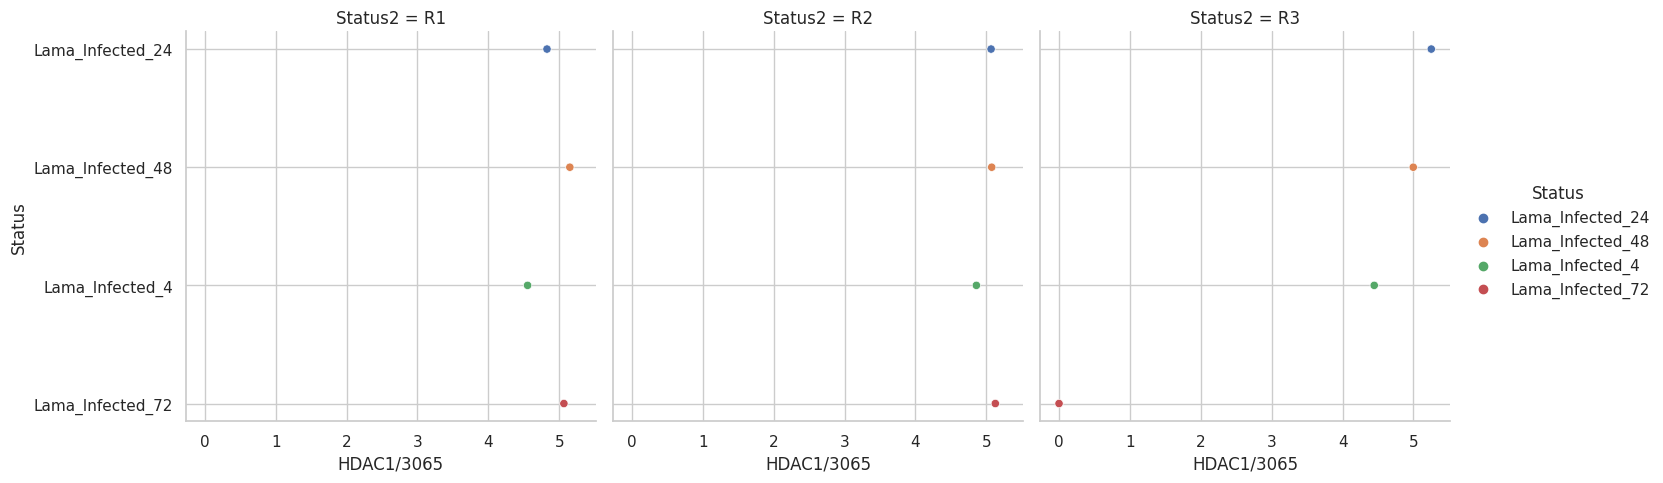

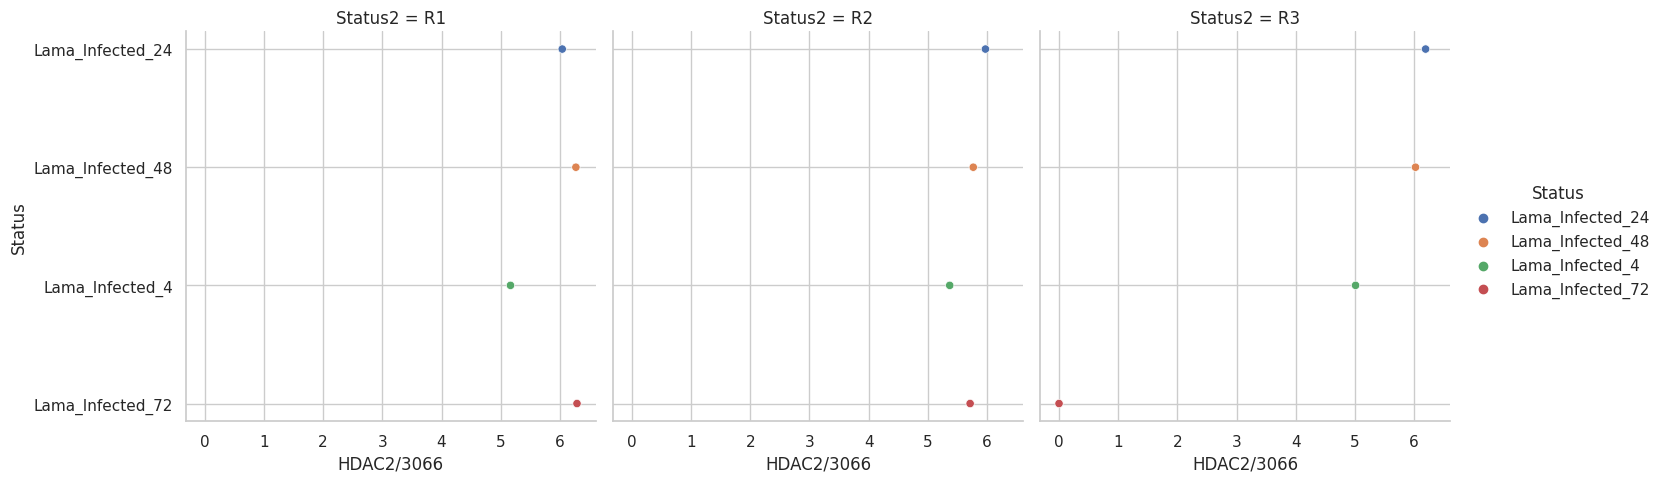

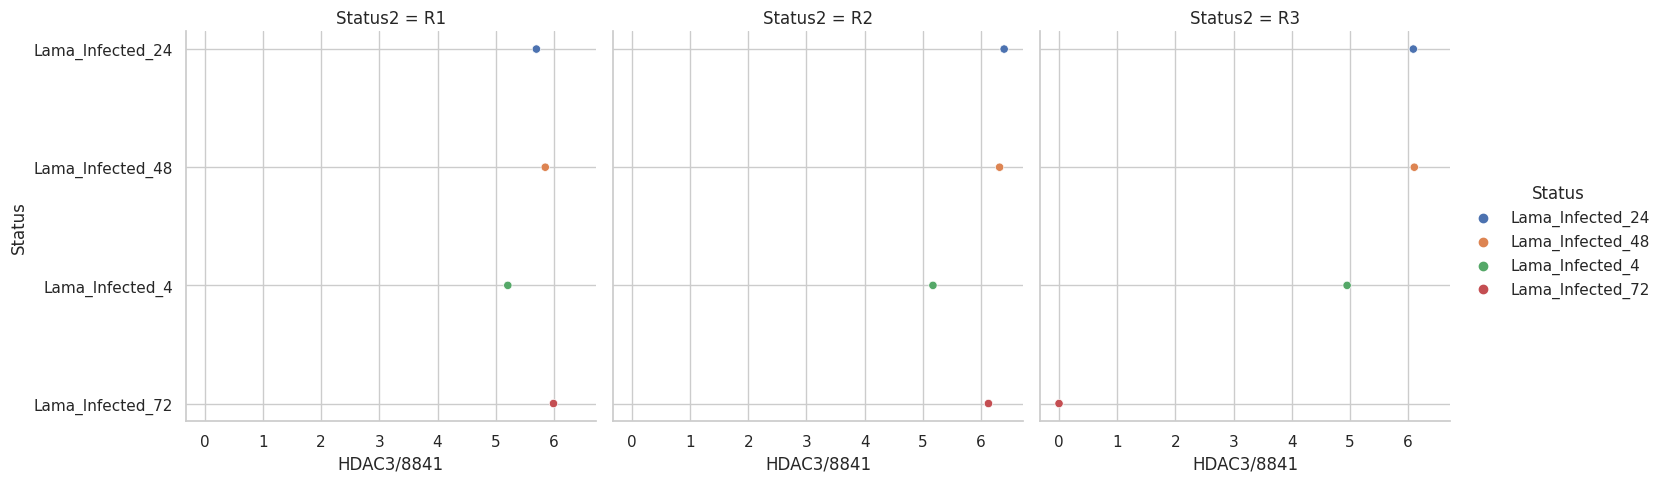

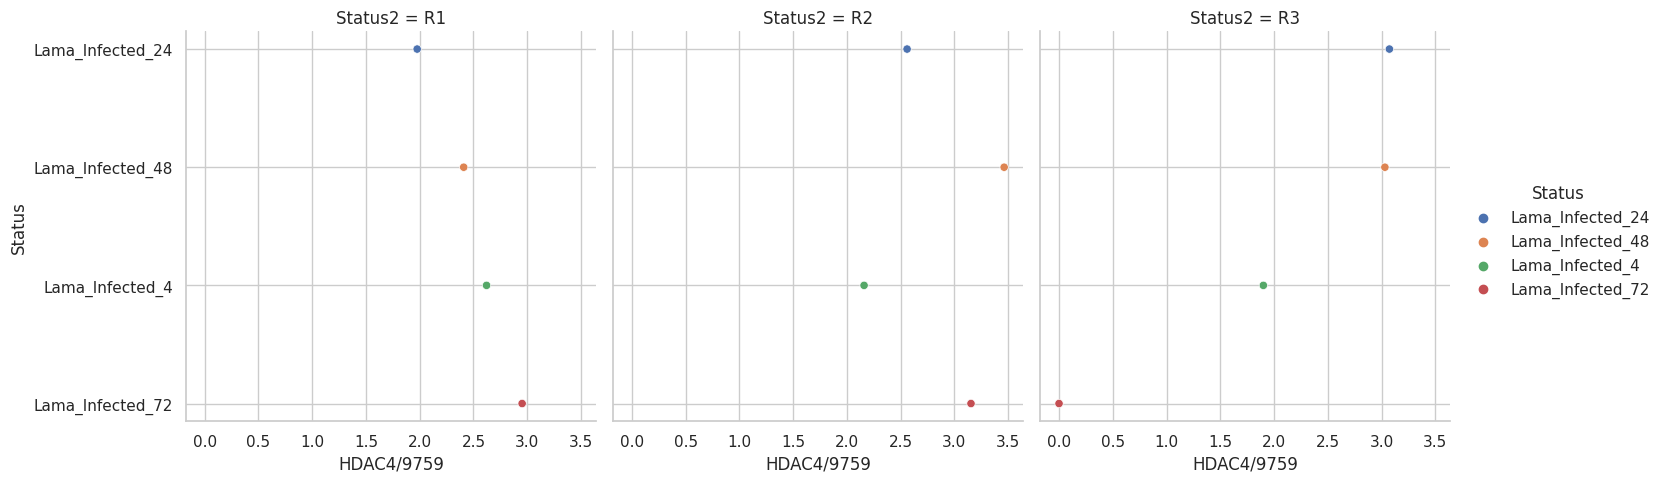

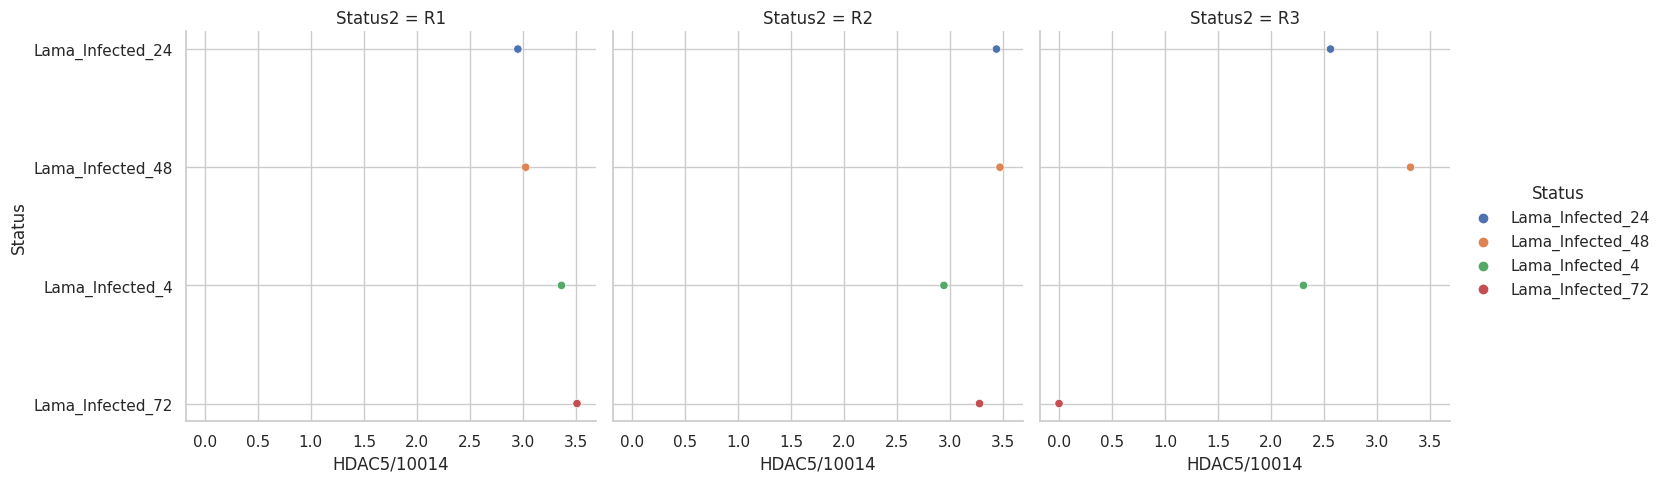

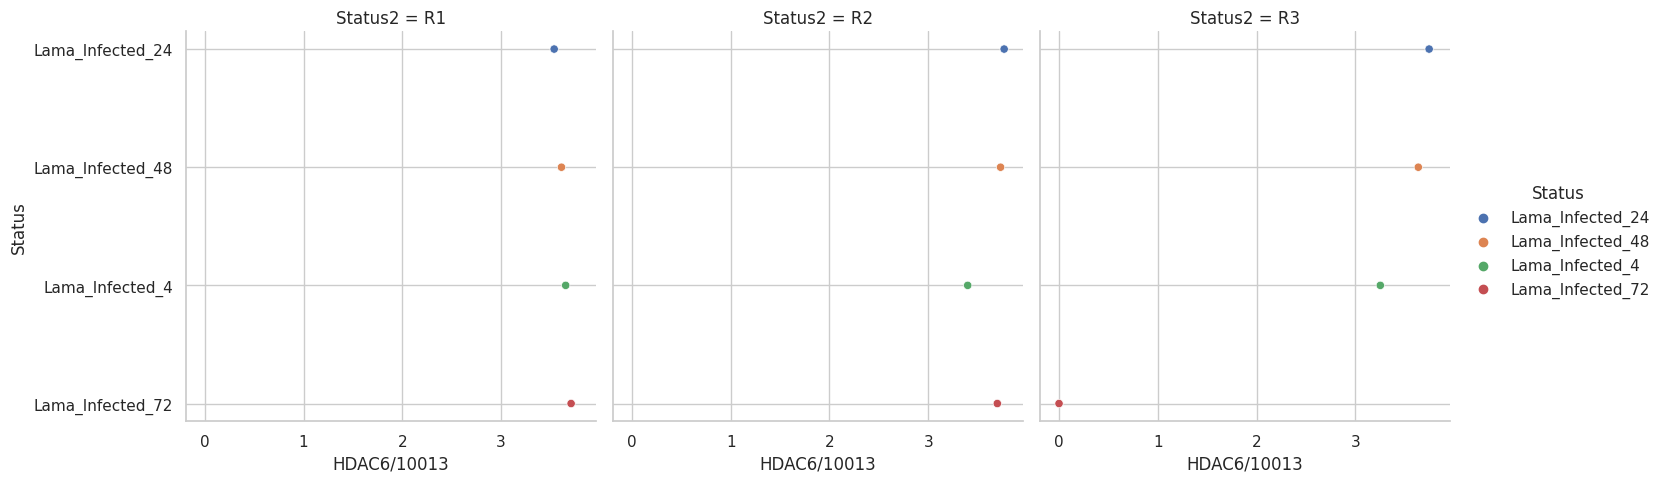

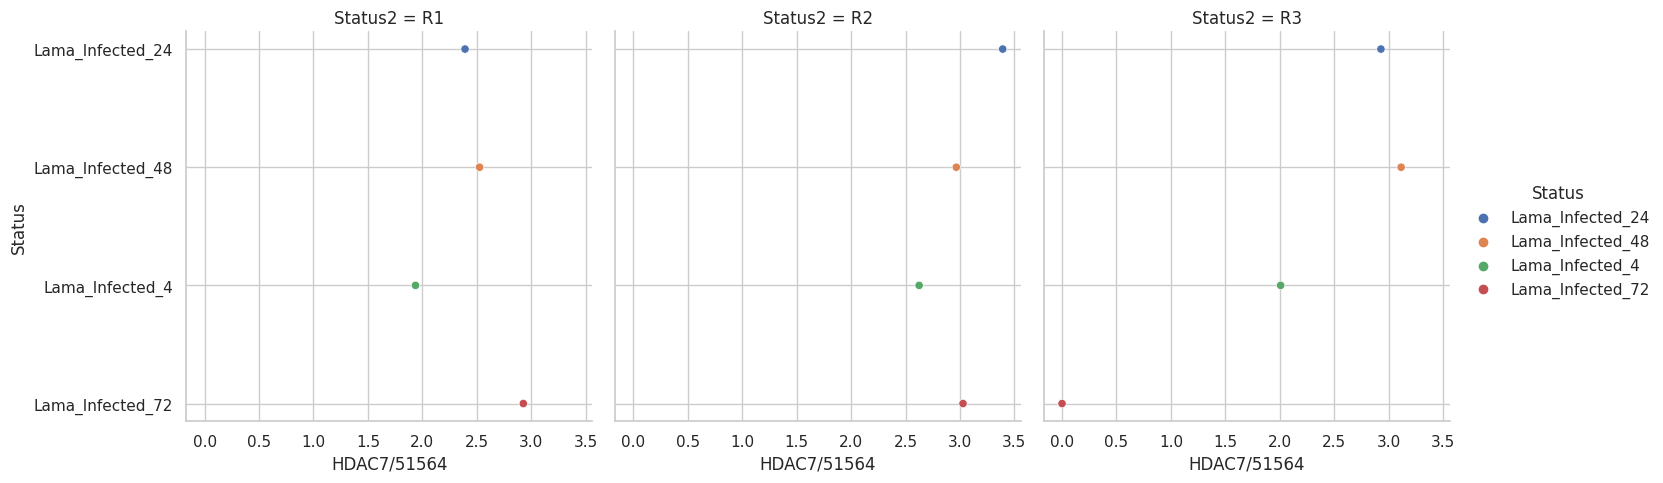

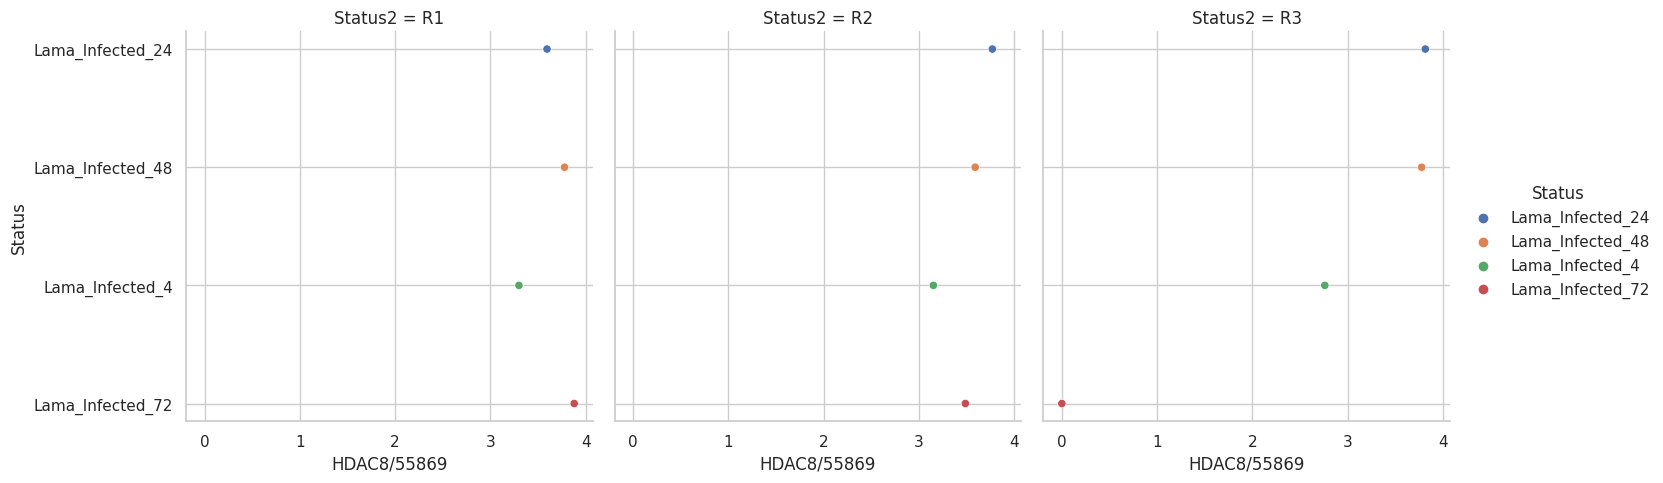

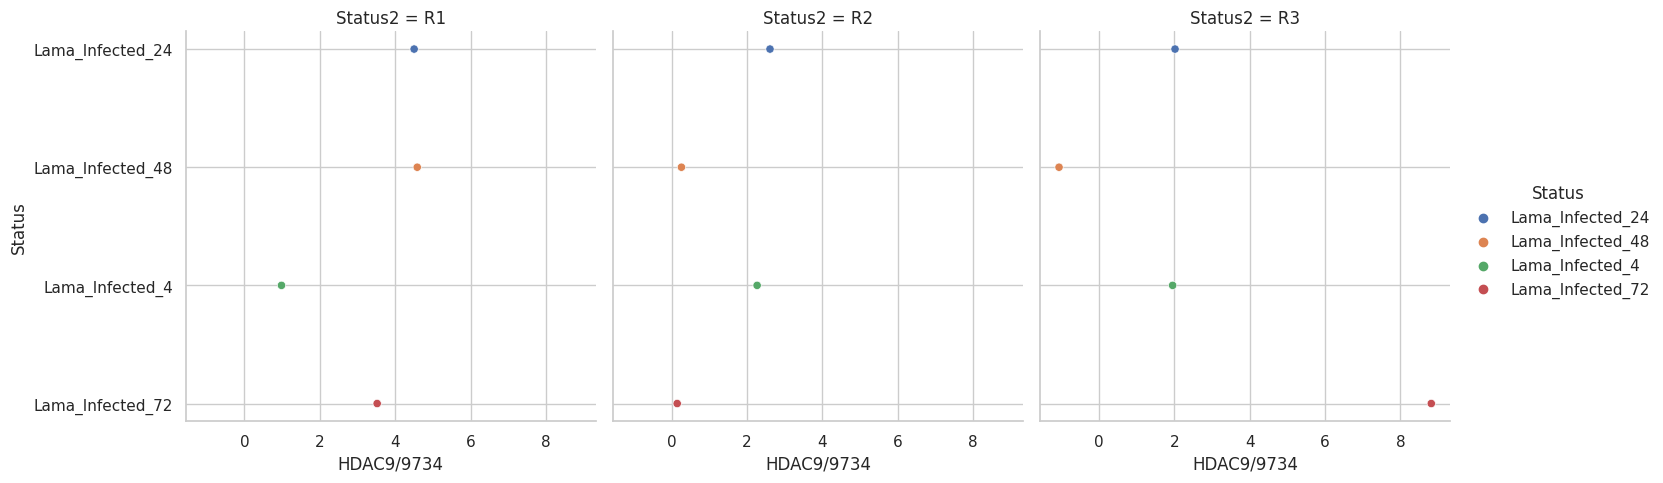

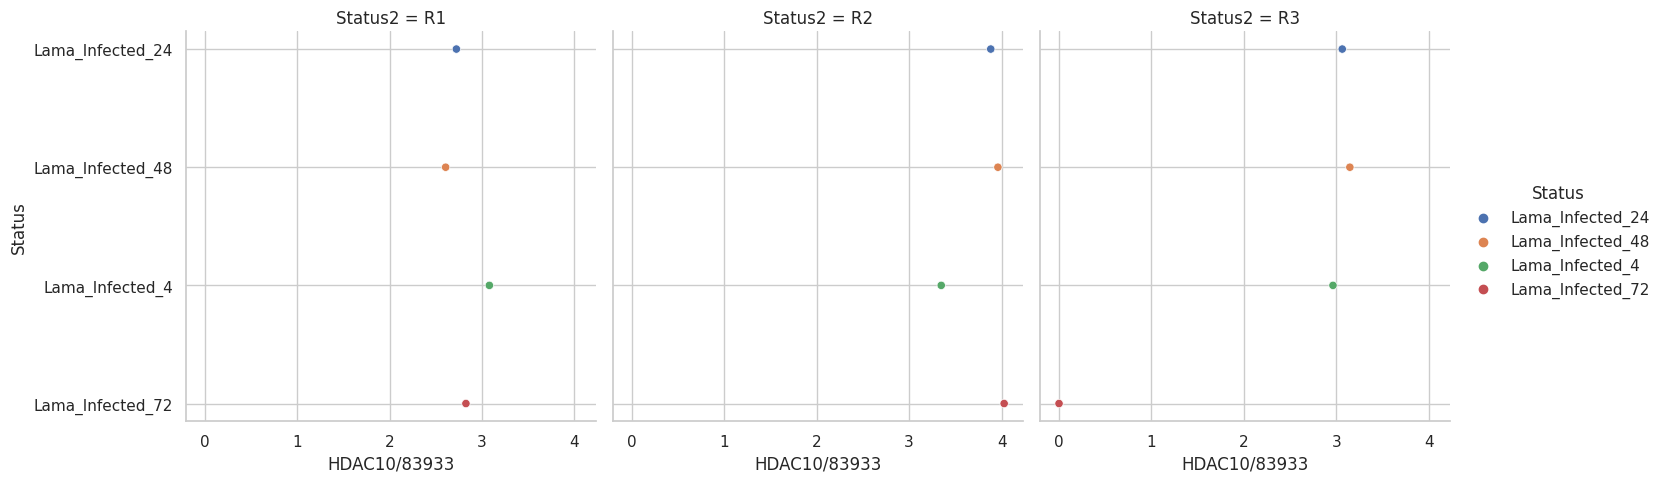

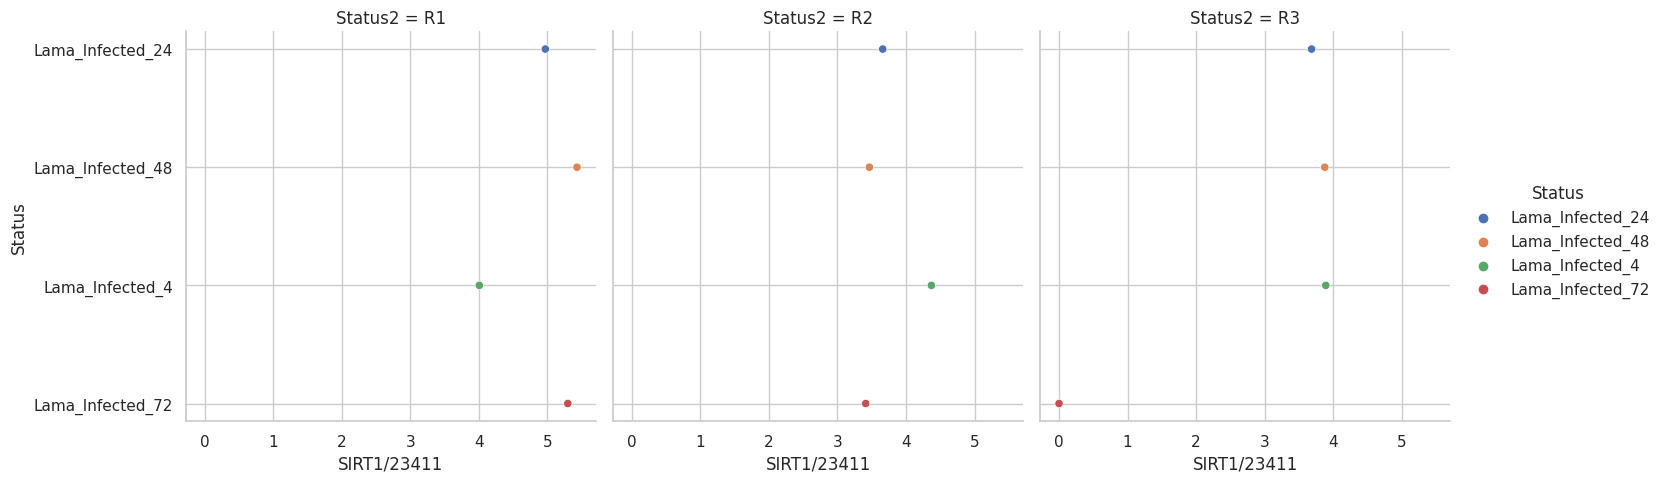

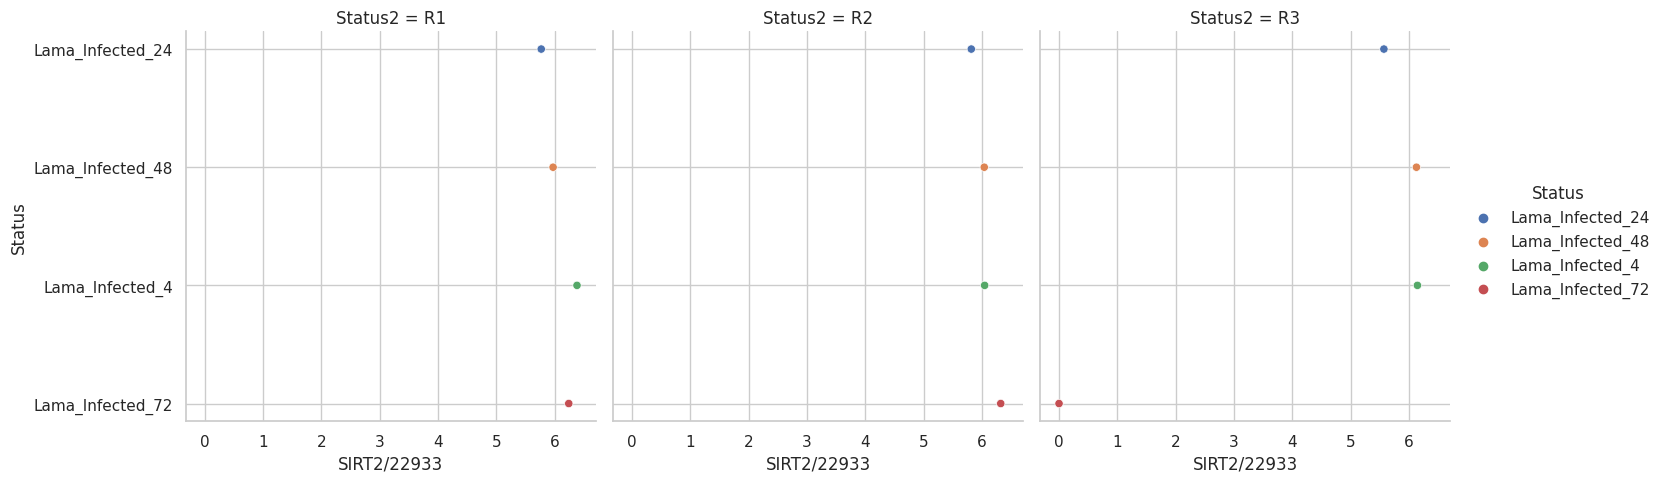

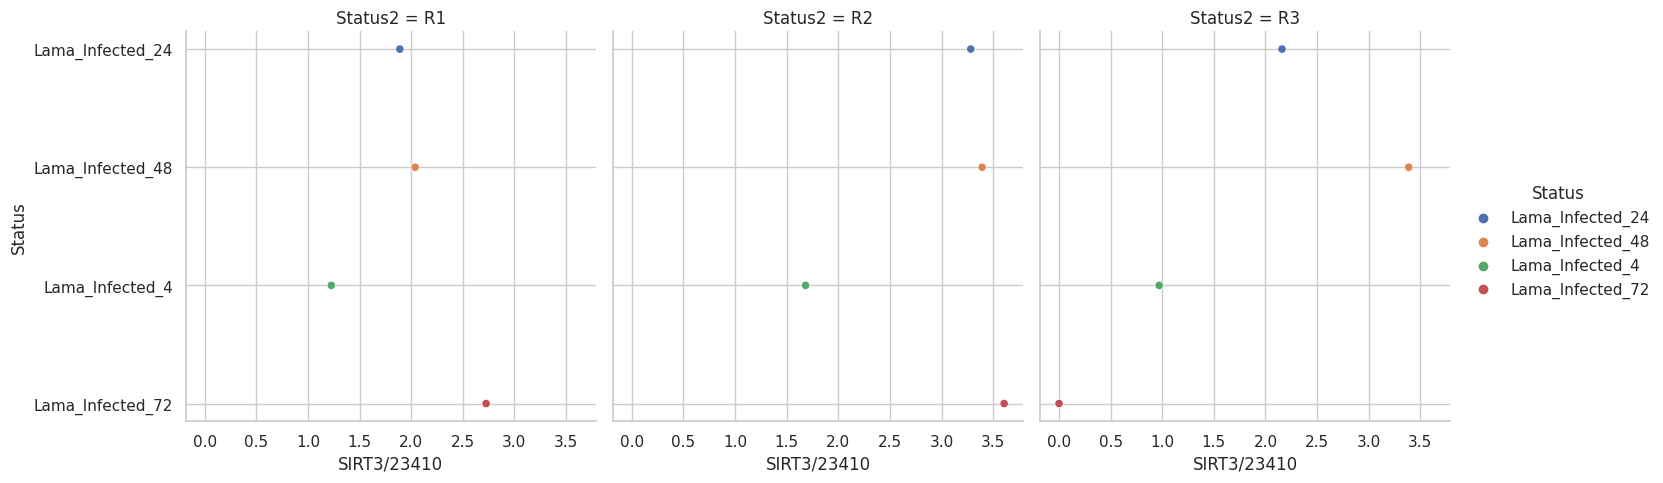

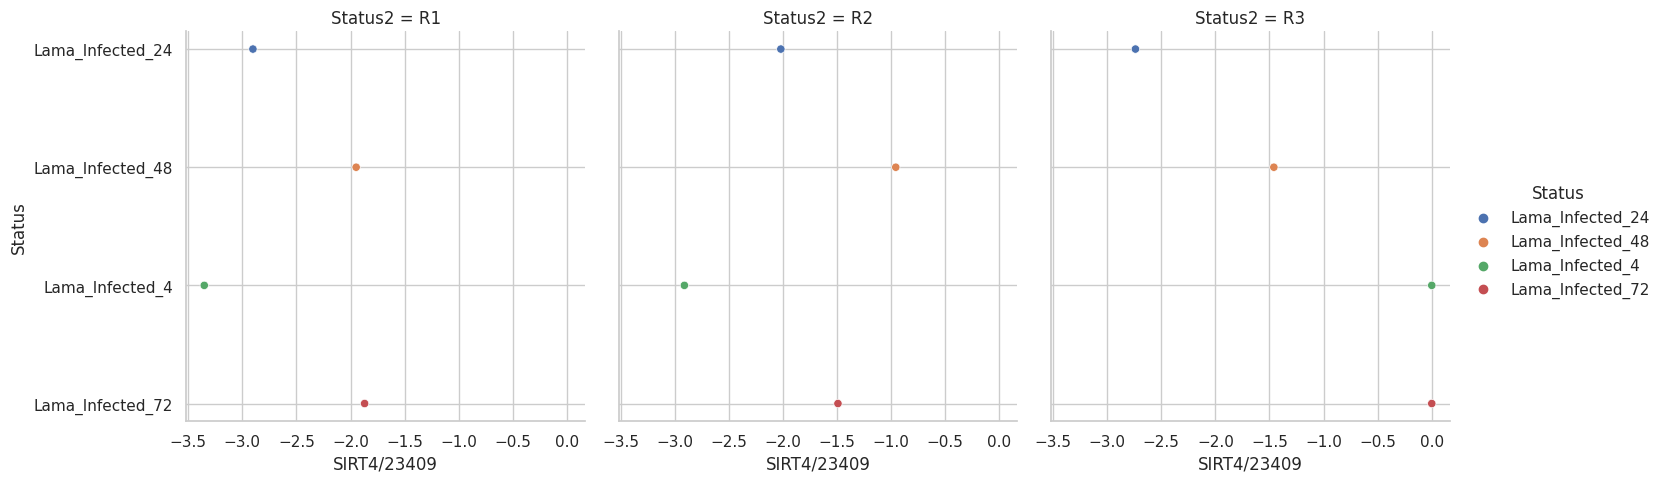

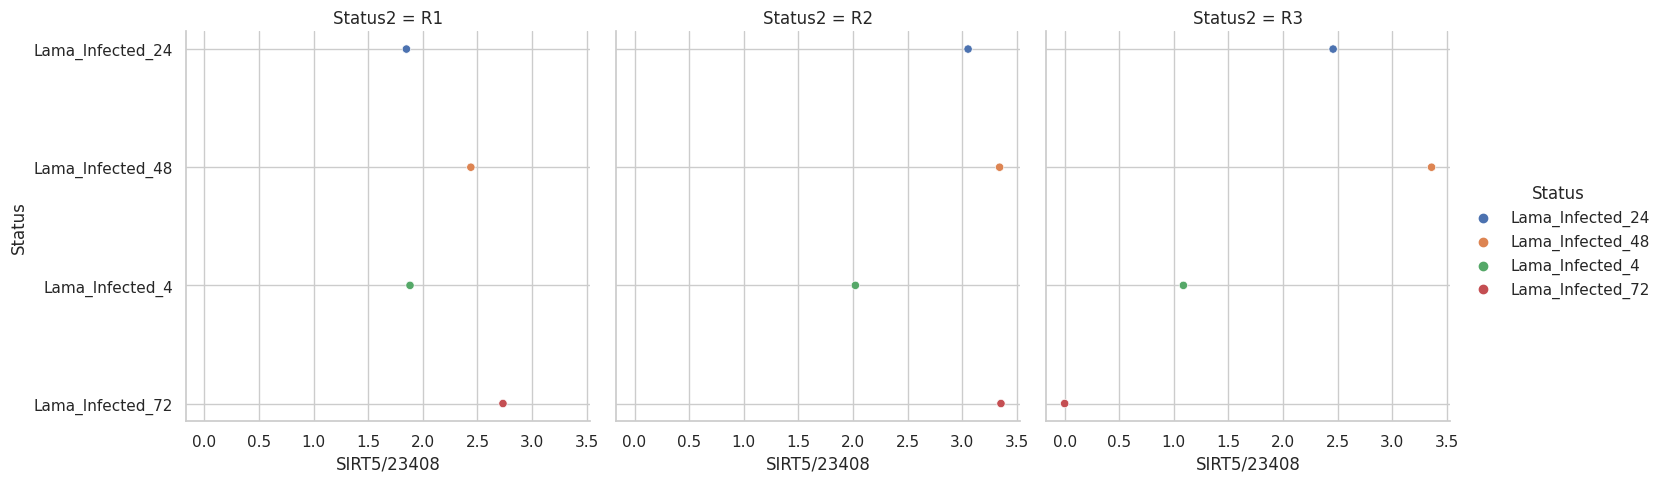

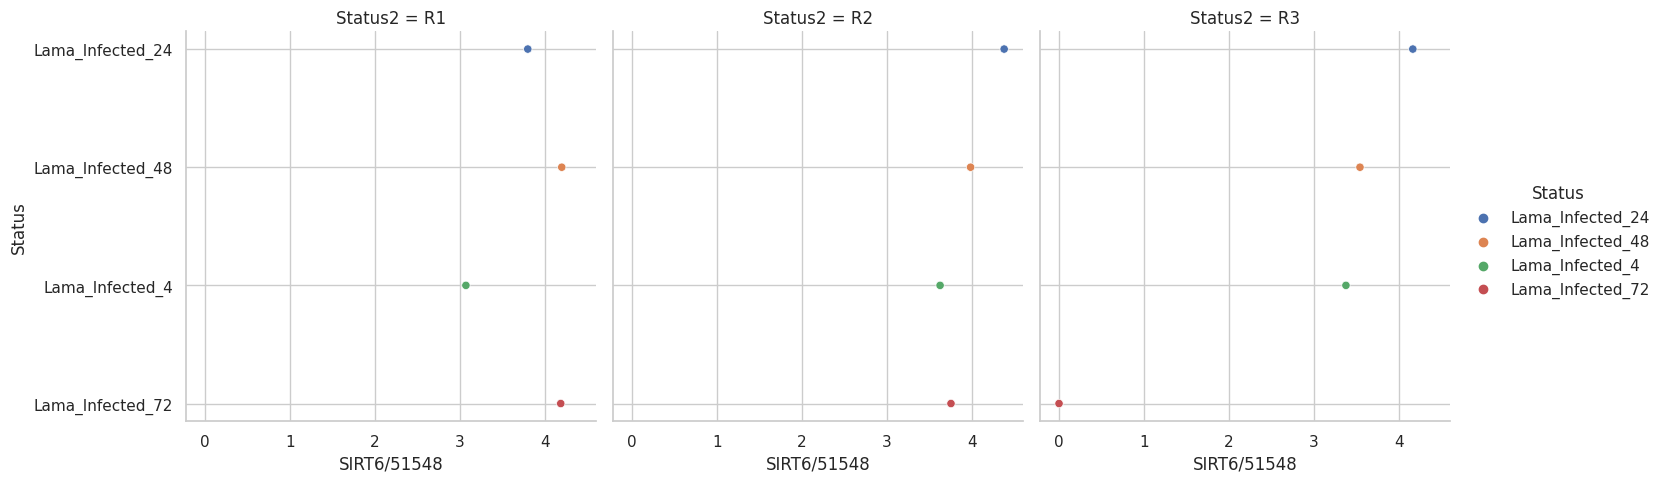

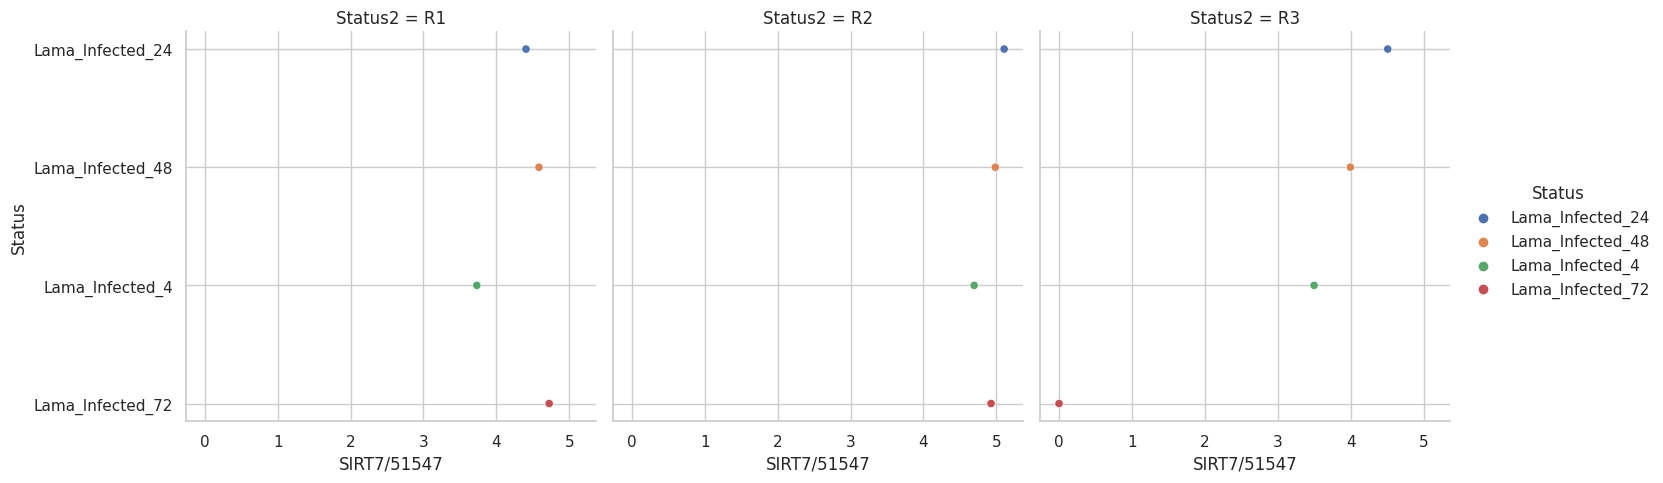

In [120]:
for i in lama_Infected:
    if "Status" in i: continue
    graficos = sns.relplot(data=lama_Infected, y="Status", x=i, col="Status2", hue="Status")
    
    plt.show()